# Final Project Submission

Please fill out:
* Student name: Gabriel Araujo
* Student pace: part time
* Scheduled project: August 15th, 2:30 
* Instructor name: James Irving
* Blog post URL: https://learn.co/blog/blog_posts/38434/edit

# INTRODUCTION

I have been tasked with investigating house sales in the King County area and building a model to suggest home improvements in order to increase house value.

The following questions will be answered in this project:

1- Which feature generates the best model, zip codes or sub regions?

2 - Which house attributes have a high impact in sale price and which attributes have the least/negative impact?

3 - Does transforming the target value improve model efficiency?


**DATA**

Column Names and descriptions for Kings County Data Set:

* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** - is prediction target
* **bedroomsNumber** - of Bedrooms/House
* **bathroomsNumber** - of bathrooms/bedrooms
* **sqft_livingsquare** - footage of the home
* **sqft_lotsquare** - footage of the lot
* **floorsTotal** - floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

**KING COUNTY GRADING SYSTEM**

Represents the construction quality of improvements. Grades run from grade 1 to 13. Generally defined as:

* **1-3** - Falls short of minimum building standards. Normally cabin or inferior structure.

* **4** - Generally older, low quality construction. Does not meet code.

* **5** - Low construction costs and workmanship. Small, simple design.

* **6** - Lowest grade currently meeting building code. Low quality materials and simple designs.

* **7** - Average grade of construction and design. Commonly seen in plats and older sub-divisions.

* **8** - Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

* **9** - Better architectural design with extra interior and exterior design and quality.

* **10** - Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

* **11** - Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

* **12** - Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

* **13** - Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.

# OBTAIN

In [1]:
#IMPORTING
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [2]:
#OPENING DATASET 
pd.set_option('display.max_columns',0)
df = pd.read_csv('kc_house_data.csv')
df.drop(columns = 'id',inplace = True)
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [3]:
#GETTING DATA INFO
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(10), object(2)
memory usage: 3.3+ MB


In [4]:
#GETTING DATA BASIC STATS
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
#LOOKING AT NULL VALUES
df.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [6]:
df['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

# SCRUB (DATA CLEANING)

Since some data is missing, steps will be taken in order to fill/remove rows with missing data. Also, column data types will be changed in order to better analyze the data.

In [127]:
#WANT TO FILL ALL NULL VALUES IN WATERFRONT WITH DISTRIBUTION OF 146:19075
s = df.waterfront.value_counts(normalize = True)
print(s)

#FILLING COLUMN WITH DESIRED DISTRIBUTION
waterfront_null = df.waterfront.isnull()
df.loc[waterfront_null,'waterfront'] = np.random.choice(s.index,size=len(df[waterfront_null]),p=s.values)
print(df.waterfront.value_counts())

0   0.99699
1   0.00301
Name: waterfront, dtype: float64
0    18225
1       55
Name: waterfront, dtype: int64


In [8]:
#CONVERTING DATE FROM OBJECT TO DATE
df.date = pd.to_datetime(df.date)

In [9]:
df[df.sqft_basement == '?']

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
18,2014-12-05,189000.0,2,1.00,1200,9850,1.0,0.0,0.0,4,7,1200,?,1921,0.0,98002,47.3089,-122.210,1060,5095
42,2014-07-07,861990.0,5,2.75,3595,5639,2.0,0.0,0.0,3,9,3595,?,2014,0.0,98053,47.6848,-122.016,3625,5639
79,2015-03-23,720000.0,4,2.50,3450,39683,2.0,0.0,0.0,3,10,3450,?,2002,0.0,98010,47.3420,-122.025,3350,39750
112,2014-09-16,272500.0,3,1.75,1540,12600,1.0,0.0,0.0,4,7,1160,?,1980,0.0,98038,47.3624,-122.031,1540,11656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21442,2014-07-11,504600.0,5,3.00,2360,5000,1.0,0.0,0.0,3,7,1390,?,2008,0.0,98103,47.6931,-122.330,2180,5009
21447,2014-07-21,337500.0,4,2.50,2330,4907,2.0,0.0,0.0,3,7,2330,?,2013,NaN,98042,47.3590,-122.081,2300,3836
21473,2015-01-20,352500.0,2,2.50,980,1010,3.0,0.0,0.0,3,8,980,?,2008,0.0,98117,47.6844,-122.387,980,1023
21519,2014-10-15,332000.0,4,2.50,2380,5737,2.0,0.0,0.0,3,7,2380,?,2010,0.0,98023,47.2815,-122.356,2380,5396


In [10]:
#SEEING IF HOUSES WITH '?' FOR SQFT_BASEMENT ACTUALLY HAVE A BASEMENT AND FILLING MISSING VALUES
for index, value in enumerate(df.sqft_basement):
    if value == '?':
        if df.sqft_living[index] != df.sqft_above[index]:
            df.sqft_basement[index] = df.sqft_living[index] - df.sqft_above[index]
        elif df.sqft_living[index] == df.sqft_above[index]:
            df.sqft_basement[index] = 0

C:\Users\Biel_\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Biel_\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [11]:
#REPLACING ALL NULL VALUES IN YR_RENOVATED TO 0 BECAUSE MAJORITY IS 0
for index, col in enumerate(df.yr_renovated.isnull()):
    if col == True:
        df.yr_renovated[index] = 0
df

C:\Users\Biel_\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [12]:
#TURNING VALUES FROM FLOAT TO INT
float_list = ['sqft_basement','waterfront','yr_renovated','sqft_basement']
for col in float_list:
    df[col] = pd.to_numeric(df[col]).astype(int).round(0)

In [13]:
df['bathrooms'] = df['bathrooms'].map(lambda x: int(round(x,0)))

In [14]:
#CREATING YEAR SOLD AND RENOVATED_POST_1990 COLUMNS
#RENOVATED_POST_1990 IS BEING CREATED BECAUSE OF THE ASSUMPTION THAT IF THE RENOVATION IS TOO OLD, 
#IT WILL LOSE ITS VALUE
df['year_sold'] = pd.DatetimeIndex(df['date']).year
df['renovated_post_1990'] = 0

In [15]:
#REPLACING 2015 YEAR RENOVATED AND YEAR BUILT WITH 2014 BECAUSE HOUSE WAS SOLD IN 2014
for i, yr in enumerate(df['year_sold']):
    if yr < df['yr_renovated'][i]:
        df['yr_renovated'][i] = yr
    elif yr < df['yr_built'][i]:
        df['yr_built'][i] = yr


C:\Users\Biel_\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Biel_\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [16]:
#CREATING HOUSE AGE WHEN SOLD COLUMNS AND FILLING IN RENOVATED_POST-1990 COLUMN
df['house_age_when_sold'] = df['date'].dt.year - df['yr_built'] 
for index, yr in enumerate(df['yr_renovated']):
    if yr >= 1990:
        df['renovated_post_1990'][index] = 1
    else:
        df['renovated_post_1990'][index] = 0
df['renovated_post_1990'].value_counts()

C:\Users\Biel_\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Biel_\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


0    21075
1      522
Name: renovated_post_1990, dtype: int64

In [17]:
#ZIPCODE TO SUB_REGION DF
subregion_df = pd.read_excel('SubRegZipCityNeighborhood.xlsx')
subregion_df

,zipcode,Sub_Region
0,98001,South_Urban
1,98002,South_Urban
2,98003,South_Urban
3,98004,East_Urban
4,98005,East_Urban
...,...,...
116,98199,Seattle
117,98224,East_Rural
118,98251,East_Rural
119,98288,East_Rural


In [18]:
#JOINING SUBREGIONS WITH ZIPCODE
df = df.join(subregion_df.set_index('zipcode'),on = 'zipcode')
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,renovated_post_1990,house_age_when_sold,Sub_Region
0,2014-10-13,221900.0,3,1,1180,5650,1.0,0,0.0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,0,59,South_Urban
1,2014-12-09,538000.0,3,2,2570,7242,2.0,0,0.0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,1,63,Seattle
2,2015-02-25,180000.0,2,1,770,10000,1.0,0,0.0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,0,82,North
3,2014-12-09,604000.0,4,3,1960,5000,1.0,0,0.0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,0,49,Seattle
4,2015-02-18,510000.0,3,2,1680,8080,1.0,0,0.0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,0,28,East_Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000.0,3,2,1530,1131,3.0,0,0.0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,2014,0,5,Seattle
21593,2015-02-23,400000.0,4,2,2310,5813,2.0,0,0.0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,2015,0,1,South_and_Seattle
21594,2014-06-23,402101.0,2,1,1020,1350,2.0,0,0.0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,2014,0,5,Seattle
21595,2015-01-16,400000.0,3,2,1600,2388,2.0,0,0.0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,2015,0,11,East_Urban


In [19]:
#CHECKING SUBREGION VALUE COUNTS
df['Sub_Region'].value_counts()

Seattle              6233
East_Urban           5694
South_Urban          5278
North                1197
East_Rural            922
South_Rural           922
North_and_Seattle     748
South_and_Seattle     288
West                  198
Vashon_Island         117
Name: Sub_Region, dtype: int64

In [20]:
#DROPPING VIEW COLUMN
df.drop('view',axis = 1,inplace =  True)

In [21]:
#DATAFRAME INFO AFTER REMOVING NULL VALUES
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
date                   21597 non-null datetime64[ns]
price                  21597 non-null float64
bedrooms               21597 non-null int64
bathrooms              21597 non-null int64
sqft_living            21597 non-null int64
sqft_lot               21597 non-null int64
floors                 21597 non-null float64
waterfront             21597 non-null int32
condition              21597 non-null int64
grade                  21597 non-null int64
sqft_above             21597 non-null int64
sqft_basement          21597 non-null int32
yr_built               21597 non-null int64
yr_renovated           21597 non-null int32
zipcode                21597 non-null int64
lat                    21597 non-null float64
long                   21597 non-null float64
sqft_living15          21597 non-null int64
sqft_lot15             21597 non-null int64
year_sold              21597 non-null 

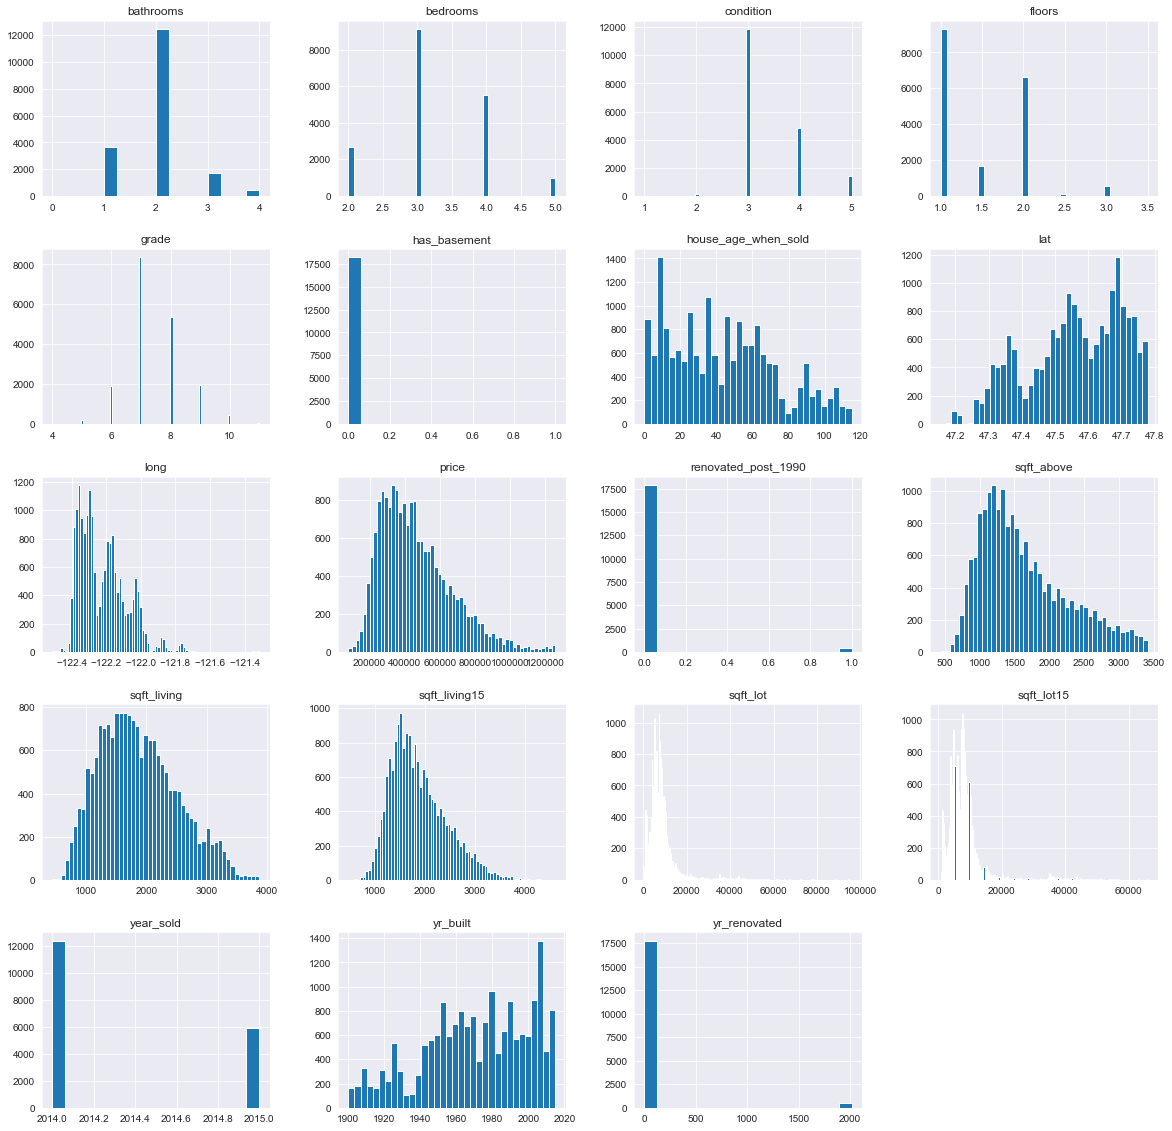

In [115]:
#CREATING HISTOGRAM OF ALL COLUMNS
df.hist(figsize = (20,20), bins = 'auto');

In [23]:
#CREATING OUTLIER LIST TO REMOVE ONLY REMOVE OUTLIERS FROM DESIRED COLUMNS
outliers_list = ['bedrooms','sqft_basement','sqft_above','sqft_living','sqft_lot','sqft_lot15','price']

#GETTING Z SCORES FOR ALL COLUMNS
z = np.abs(stats.zscore(df[outliers_list]))

#REMOVING OUTLIERS (USED Z<= 1.96 TO MAINTAIN 95% OF THE DATA)
df = df[(z<=1.96).all(axis=1)]
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,renovated_post_1990,house_age_when_sold,Sub_Region
0,2014-10-13,221900.0,3,1,1180,5650,1.0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,0,59,South_Urban
1,2014-12-09,538000.0,3,2,2570,7242,2.0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,1,63,Seattle
2,2015-02-25,180000.0,2,1,770,10000,1.0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,0,82,North
3,2014-12-09,604000.0,4,3,1960,5000,1.0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,0,49,Seattle
4,2015-02-18,510000.0,3,2,1680,8080,1.0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,0,28,East_Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000.0,3,2,1530,1131,3.0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,2014,0,5,Seattle
21593,2015-02-23,400000.0,4,2,2310,5813,2.0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,2015,0,1,South_and_Seattle
21594,2014-06-23,402101.0,2,1,1020,1350,2.0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,2014,0,5,Seattle
21595,2015-01-16,400000.0,3,2,1600,2388,2.0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,2015,0,11,East_Urban


In [24]:
#TURNING SQFT BASEMENT COLUMN INTO BINARY (CONTAINS BASEMENT OR NOT)
df['has_basement'] = 0
for index,basement in enumerate(df['sqft_basement']):
    if basement > 0:
        df['has_basement'][index] = 1
df.drop('sqft_basement',axis = 1, inplace = True)

C:\Users\Biel_\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Biel_\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Biel_\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

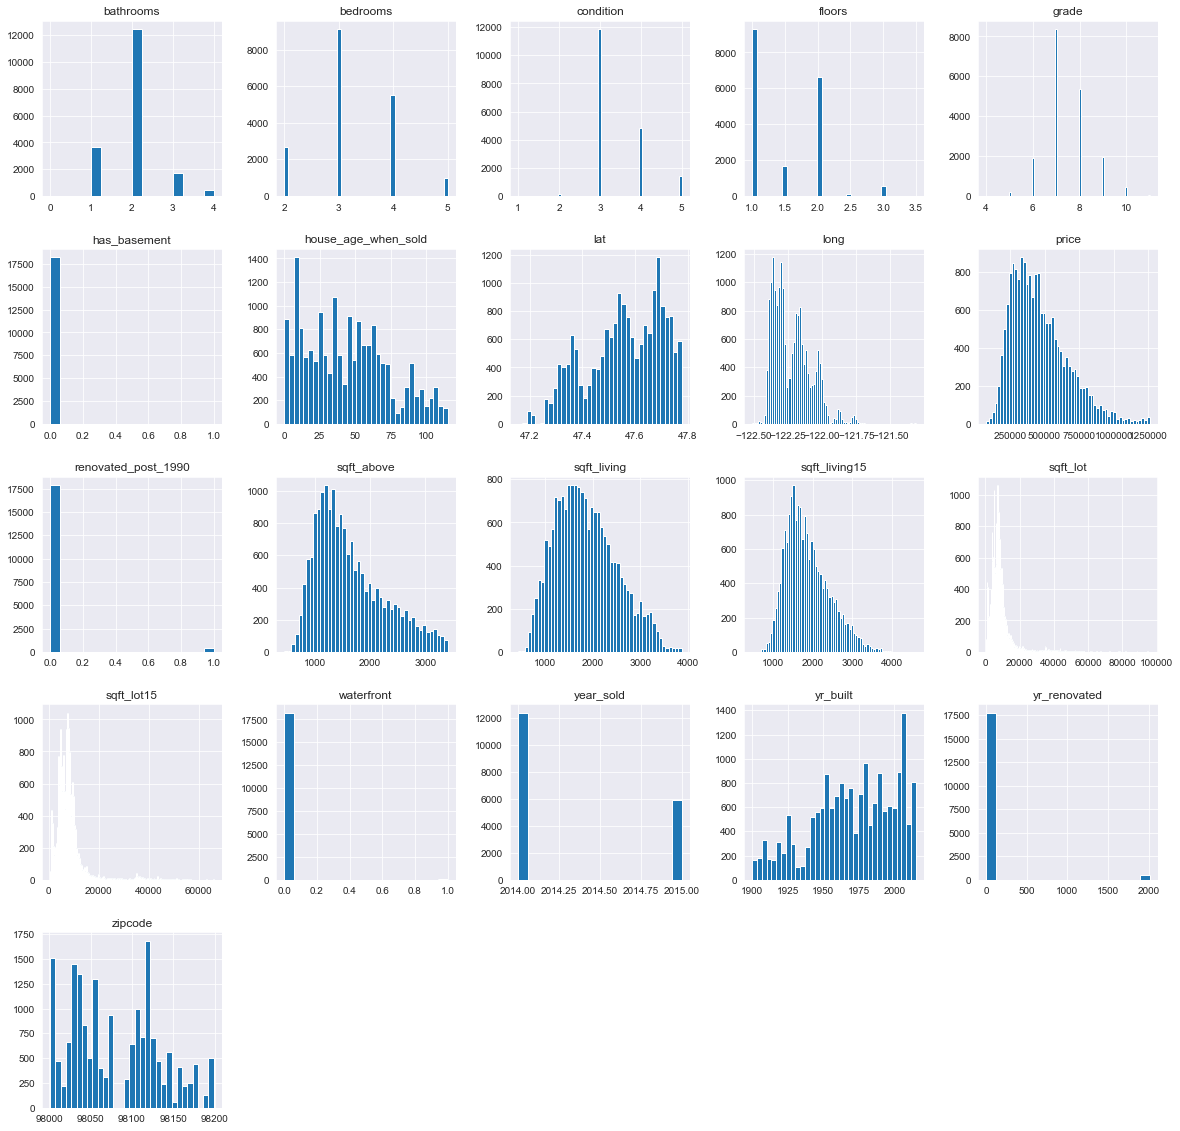

In [25]:
#CHECKING HISTOGRAM FOR ALL COLUMNS AFTER OUTLIERS WERE REMOVED
df.hist(figsize = (20,20), bins = 'auto');

In [26]:
#TURNING COLUMNS TO STRING FOR HOT ENCODING
categories = ['Sub_Region','waterfront','zipcode']
for cat in categories:
    df[cat] = df[cat].astype(str)
categories = ['Sub_Region','waterfront']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18280 entries, 0 to 21596
Data columns (total 23 columns):
date                   18280 non-null datetime64[ns]
price                  18280 non-null float64
bedrooms               18280 non-null int64
bathrooms              18280 non-null int64
sqft_living            18280 non-null int64
sqft_lot               18280 non-null int64
floors                 18280 non-null float64
waterfront             18280 non-null object
condition              18280 non-null int64
grade                  18280 non-null int64
sqft_above             18280 non-null int64
yr_built               18280 non-null int64
yr_renovated           18280 non-null int32
zipcode                18280 non-null object
lat                    18280 non-null float64
long                   18280 non-null float64
sqft_living15          18280 non-null int64
sqft_lot15             18280 non-null int64
year_sold              18280 non-null int64
renovated_post_1990    18280 non-nul

C:\Users\Biel_\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


# EXPLORE

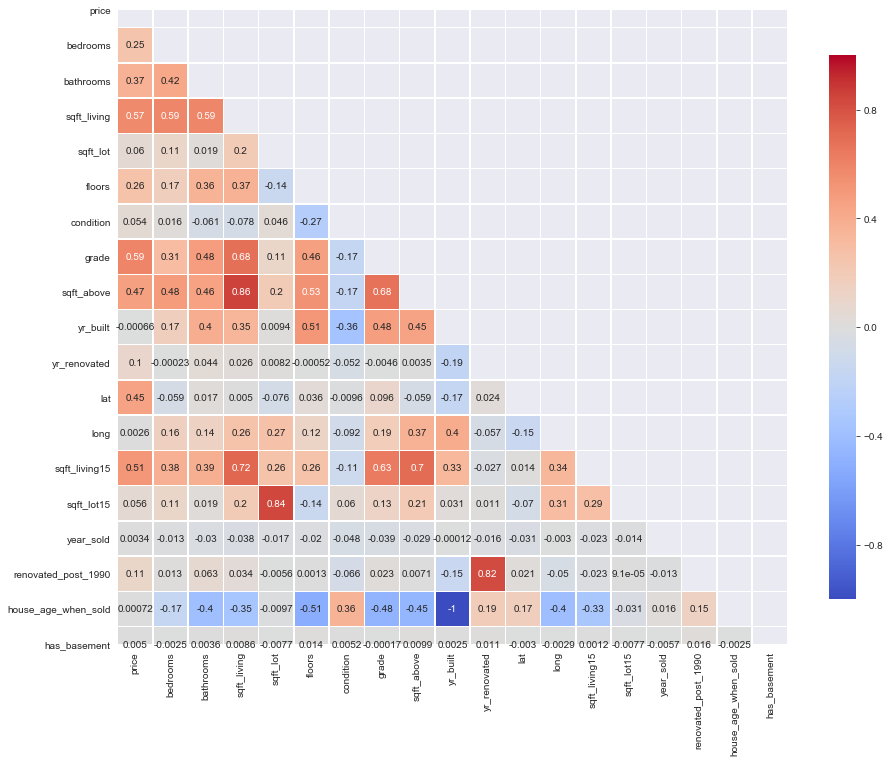

In [27]:
#CORRELATION HEATMAP
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 20))

sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, center=0,
            square=True, linewidths=.5,annot=True, cbar_kws={"shrink": .5});

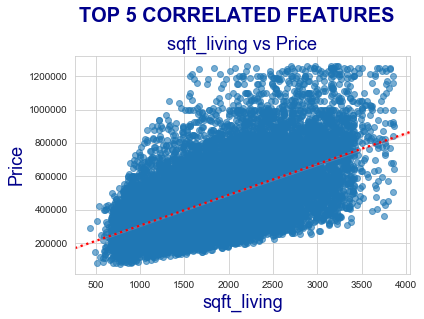

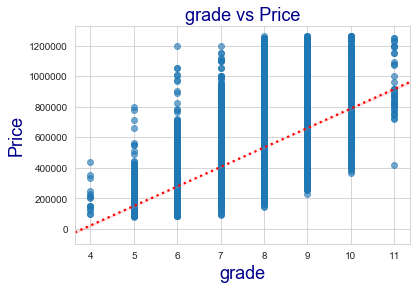

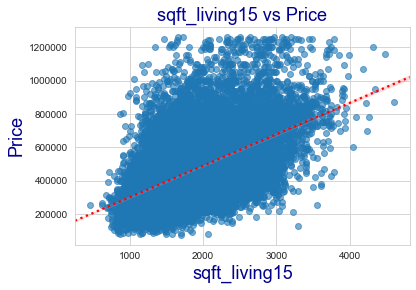

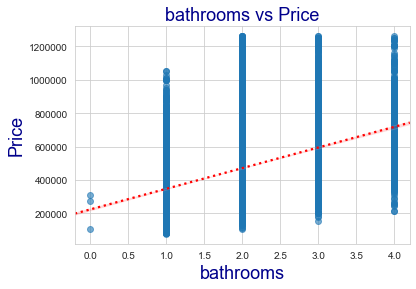

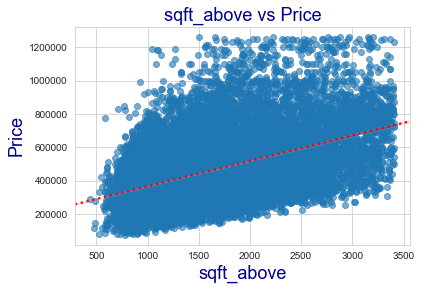

In [125]:
#CREATING SCATTER PLOT WITH TOP 5 CORRELATED COLUMNS WITH PRICE
top_5_cols = ['sqft_living','grade','sqft_living15','bathrooms','sqft_above']
sns.set_style("whitegrid")
plt.suptitle('TOP 5 CORRELATED FEATURES',y=1.05,fontsize=20, color = 'darkblue',weight='bold')
for col in top_5_cols:

    figure = plt.figure
    ax = plt.gca()
    sns.regplot(col,'price',df,ax=ax,scatter_kws=dict(alpha=0.6),line_kws={'color':'red', 'ls':':'})
    ax.set_xlabel(col,fontsize = 18,color='darkblue')
    ax.set_ylabel('Price',fontsize = 18,color='darkblue')
    ax.set_title("{} vs {}".format(col, 'Price'), fontsize = 18,color='darkblue')
    
    plt.show()

The TOP 5 most correlated features with price will be used to create a base model. This model will be used as a starting point so improvements can be made from it.

# BASE MODEL

In [29]:
#DEFINING TARGET AND PREDICTORS
y = 'price'
df_predictors_1 = df[top_5_cols]
X_1 = list(df_predictors_1.columns)

In [30]:
#TEST TRAIN SPLIT (WILL BE USING RANDOM_STATE = 69 THROUGH OUT THE MODEL TO MAKE SURE
#THAT THE SAME DATA SET IS BEING USED IN ALL FUTURE MODELS )
X_train, X_test, y_train, y_test = train_test_split(df[X_1], df[y], test_size=0.25, random_state=69)
print(len(X_train), len(X_test), len(y_train), len(y_test))

13710 4570 13710 4570


In [31]:
#COMBINING XTRAIN YTRAIN AND XTEST YTEST
train_df = pd.concat([y_train,X_train],axis=1)
test_df = pd.concat([y_test,X_test],axis=1)

In [32]:
#FITTING MODEL
predictors = '+'.join(X_train.columns)
formula = y + '~' + predictors
model_1 = ols(formula=formula, data=train_df).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     2041.
Date:                Thu, 06 Aug 2020   Prob (F-statistic):               0.00
Time:                        18:45:04   Log-Likelihood:            -1.8327e+05
No. Observations:               13710   AIC:                         3.666e+05
Df Residuals:                   13704   BIC:                         3.666e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -3.77e+05   1.15e+04    -32.761      0.000      -4e+05   -3.54e+05
sqft_living     146.6933      4.760     30.819      0.000     137.363     156.023
grade          8.616e+04   2040.154     42.232      0.000    8.22e+04    9.02e+04
sqft_living15    45.4670      3.651     12.452      0.000      38.310      52.624
bathrooms     -5489.4877   2723.916     -2.015      0.044   -1.08e+04    -150.239
sqft_above      -90.9775      4.326    -21.029      0.000     -99.458     -82.497
==============================================================================
Omnibus:                     1257.212   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1795.206
Skew:                           0.731   Prob(JB):                         0.00
Kurtosis:                       4.001   Cond. No.                     2.86e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.86e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

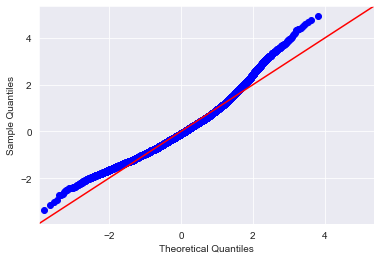

In [33]:
#CHECKING IF RESIDUALS ARE NORMALLY DISTRIBUTED
fig = sm.graphics.qqplot(model_1.resid, dist=stats.norm, line='45', fit=True)

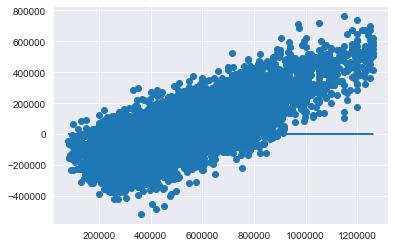

In [34]:
#CHECKING FOR HOMOSCEDACITY
plt.scatter(train_df['price'],model_1.resid)
plt.plot(train_df['price'], [0 for i in range(len(train_df))])

**ANALYSIS**

This base model, which used the top 5 features correlated with price, is only able to explain 43% of variability in price. It is a good starting point to be able to make improvements. The residuals a pretty normally distributed.


# MODEL 2 WITH ALL COLUMNS EXCEPT DATE,ZIPCODE, LAT,LONG

In [35]:
#ONE-HOT ENCODING CATEGORICAL COLUMNS
dummies = pd.get_dummies(df[categories],prefix = categories,drop_first = True)
df_preprocessed_2 = df.drop(categories,axis = 1)
df_preprocessed_2 = pd.concat([df_preprocessed_2,dummies],axis = 1)
df_preprocessed_2

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,renovated_post_1990,house_age_when_sold,has_basement,Sub_Region_East_Urban,Sub_Region_North,Sub_Region_North_and_Seattle,Sub_Region_Seattle,Sub_Region_South_Rural,Sub_Region_South_Urban,Sub_Region_South_and_Seattle,Sub_Region_Vashon_Island,Sub_Region_West,waterfront_1
0,2014-10-13,221900.0,3,1,1180,5650,1.0,3,7,1180,1955,0,98178,47.5112,-122.257,1340,5650,2014,0,59,0,0,0,0,0,0,1,0,0,0,0
1,2014-12-09,538000.0,3,2,2570,7242,2.0,3,7,2170,1951,1991,98125,47.7210,-122.319,1690,7639,2014,1,63,1,0,0,0,1,0,0,0,0,0,0
2,2015-02-25,180000.0,2,1,770,10000,1.0,3,6,770,1933,0,98028,47.7379,-122.233,2720,8062,2015,0,82,0,0,1,0,0,0,0,0,0,0,0
3,2014-12-09,604000.0,4,3,1960,5000,1.0,5,7,1050,1965,0,98136,47.5208,-122.393,1360,5000,2014,0,49,1,0,0,0,1,0,0,0,0,0,0
4,2015-02-18,510000.0,3,2,1680,8080,1.0,3,8,1680,1987,0,98074,47.6168,-122.045,1800,7503,2015,0,28,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000.0,3,2,1530,1131,3.0,3,8,1530,2009,0,98103,47.6993,-122.346,1530,1509,2014,0,5,0,0,0,0,1,0,0,0,0,0,0
21593,2015-02-23,400000.0,4,2,2310,5813,2.0,3,8,2310,2014,0,98146,47.5107,-122.362,1830,7200,2015,0,1,0,0,0,0,0,0,0,1,0,0,0
21594,2014-06-23,402101.0,2,1,1020,1350,2.0,3,7,1020,2009,0,98144,47.5944,-122.299,1020,2007,2014,0,5,0,0,0,0,1,0,0,0,0,0,0
21595,2015-01-16,400000.0,3,2,1600,2388,2.0,3,8,1600,2004,0,98027,47.5345,-122.069,1410,1287,2015,0,11,0,1,0,0,0,0,0,0,0,0,0


In [36]:
#DEFINING TARGET AND PREDICTORS
y = 'price'
df_predictors_2 = df_preprocessed_2.drop(['price','date','zipcode','lat','long'],axis = 1)
X_2 = list(df_predictors_2.columns)

In [37]:
#TEST TRAIN SPLIT
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(df_preprocessed_2[X_2], df_preprocessed_2[y], test_size=0.25, random_state=69)
print(len(X_train_2), len(X_test_2), len(y_train_2), len(y_test_2))

13710 4570 13710 4570


In [38]:
#COMBINING XTRAIN YTRAIN AND XTEST YTEST
train_df_2 = pd.concat([y_train_2,X_train_2],axis=1)
test_df_2 = pd.concat([y_test_2,X_test_2],axis=1)

In [39]:
#FITTING MODEL
predictors_2 = '+'.join(X_train_2.columns)
formula = y + '~' + predictors_2
model_2 = ols(formula=formula, data=train_df_2).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     1453.
Date:                Thu, 06 Aug 2020   Prob (F-statistic):               0.00
Time:                        18:45:05   Log-Likelihood:            -1.7820e+05
No. Observations:               13710   AIC:                         3.565e+05
Df Residuals:                   13684   BIC:                         3.567e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                    -4.588e+07   3.95e+06    -11.616      0.000   -5.36e+07   -3.81e+07
bedrooms                     -1.186e+04   1530.126     -7.750      0.000   -1.49e+04   -8859.557
bathrooms                     1.508e+04   2028.537      7.433      0.000    1.11e+04    1.91e+04
sqft_living                     96.0364      3.743     25.660      0.000      88.700     103.372
sqft_lot                         1.0497      0.189      5.549      0.000       0.679       1.421
floors                        1.345e+04   2538.309      5.298      0.000    8473.654    1.84e+04
condition                     2.685e+04   1586.336     16.923      0.000    2.37e+04       3e+04
grade                         6.753e+04   1579.370     42.757      0.000    6.44e+04    7.06e+04
sqft_above                       2.2816      3.644      0.626      0.531      -4.861       9.424
yr_built                      7006.4058    654.227     10.709      0.000    5724.031    8288.780
yr_renovated                    -0.2779      4.952     -0.056      0.955      -9.985       9.429
sqft_living15                   56.7720      2.679     21.195      0.000      51.522      62.022
sqft_lot15                      -1.2129      0.238     -5.091      0.000      -1.680      -0.746
year_sold                      1.55e+04   1306.644     11.865      0.000    1.29e+04    1.81e+04
renovated_post_1990           6.683e+04   1.17e+04      5.715      0.000    4.39e+04    8.98e+04
house_age_when_sold           8496.8175    653.354     13.005      0.000    7216.155    9777.480
has_basement                  5.386e+04   2.76e+04      1.949      0.051    -316.065    1.08e+05
Sub_Region_East_Urban         1.088e+05   5098.859     21.344      0.000    9.88e+04    1.19e+05
Sub_Region_North              1.452e+04   6052.453      2.398      0.016    2651.754    2.64e+04
Sub_Region_North_and_Seattle  3.322e+04   6852.942      4.847      0.000    1.98e+04    4.67e+04
Sub_Region_Seattle            1.237e+05   5494.710     22.520      0.000    1.13e+05    1.35e+05
Sub_Region_South_Rural       -7.781e+04   6505.049    -11.961      0.000   -9.06e+04   -6.51e+04
Sub_Region_South_Urban       -9.605e+04   5049.765    -19.020      0.000   -1.06e+05   -8.61e+04
Sub_Region_South_and_Seattle -1.108e+04   8931.908     -1.241      0.215   -2.86e+04    6425.418
Sub_Region_Vashon_Island     -3.976e+04   1.87e+04     -2.128      0.033   -7.64e+04   -3130.804
Sub_Region_West               1.414e+04   1.29e+04      1.097      0.273   -1.11e+04    3.94e+04
waterfront_1                  2.963e+05   1.72e+04     17.225      0.000    2.63e+05     3.3e+05
==============================================================================
Omnibus:                     1940.106   Durbin-Watson:                   2.001
Prob(Omnibus): 

In [40]:
#REMOVING FEATURES WITH P-VALUE > 0.05
summary_2 = model_2.summary()
p_table_2 = summary_2.tables[1]
p_table_2 = pd.DataFrame(p_table_2.data)
p_table_2.columns = p_table_2.iloc[0]
p_table_2 = p_table_2.drop(0)
p_table_2 = p_table_2.set_index(p_table_2.columns[0])
p_table_2['P>|t|'] = p_table_2['P>|t|'].astype(float)
x_cols_2 = list(p_table_2[p_table_2['P>|t|'] < 0.05].index)
x_cols_2.remove('Intercept')
print(len(p_table_2), len(x_cols_2))

27 21


In [41]:
#FITTING REVISED MODEL
predictors_2 = '+'.join(x_cols_2)
formula = y + '~' + predictors_2
model_2 = ols(formula=formula, data=train_df_2).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     1815.
Date:                Thu, 06 Aug 2020   Prob (F-statistic):               0.00
Time:                        18:45:05   Log-Likelihood:            -1.7821e+05
No. Observations:               13710   AIC:                         3.565e+05
Df Residuals:                   13689   BIC:                         3.566e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                    -4.579e+07   3.95e+06    -11.594      0.000   -5.35e+07    -3.8e+07
bedrooms                     -1.188e+04   1529.521     -7.765      0.000   -1.49e+04   -8878.921
bathrooms                     1.473e+04   1977.114      7.452      0.000    1.09e+04    1.86e+04
sqft_living                     97.5171      2.827     34.501      0.000      91.977     103.057
sqft_lot                         1.0583      0.189      5.596      0.000       0.688       1.429
floors                        1.427e+04   2230.604      6.396      0.000    9894.580    1.86e+04
condition                     2.689e+04   1579.488     17.024      0.000    2.38e+04       3e+04
grade                         6.768e+04   1563.959     43.274      0.000    6.46e+04    7.07e+04
yr_built                      6993.7702    654.154     10.691      0.000    5711.539    8276.002
sqft_living15                   57.2897      2.652     21.599      0.000      52.091      62.489
sqft_lot15                      -1.1677      0.237     -4.927      0.000      -1.632      -0.703
year_sold                     1.547e+04   1306.549     11.841      0.000    1.29e+04     1.8e+04
renovated_post_1990           6.647e+04   6729.857      9.877      0.000    5.33e+04    7.97e+04
house_age_when_sold           8477.4767    653.298     12.976      0.000    7196.923    9758.030
Sub_Region_East_Urban         1.102e+05   4282.427     25.731      0.000    1.02e+05    1.19e+05
Sub_Region_North              1.577e+04   5347.250      2.949      0.003    5289.919    2.63e+04
Sub_Region_North_and_Seattle  3.479e+04   6190.477      5.620      0.000    2.27e+04    4.69e+04
Sub_Region_Seattle            1.253e+05   4526.140     27.675      0.000    1.16e+05    1.34e+05
Sub_Region_South_Rural        -7.63e+04   5919.422    -12.890      0.000   -8.79e+04   -6.47e+04
Sub_Region_South_Urban       -9.446e+04   4201.646    -22.481      0.000   -1.03e+05   -8.62e+04
Sub_Region_Vashon_Island     -3.879e+04   1.84e+04     -2.102      0.036    -7.5e+04   -2626.073
waterfront_1                  2.947e+05   1.71e+04     17.191      0.000    2.61e+05    3.28e+05
==============================================================================
Omnibus:                     1923.867   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5554.419
Skew:                           0.753   Prob(JB):                         0.00
Kurtosis:                       5.730   Cond. No.                     4.75e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.78e-23. This might indicate that there are
stron

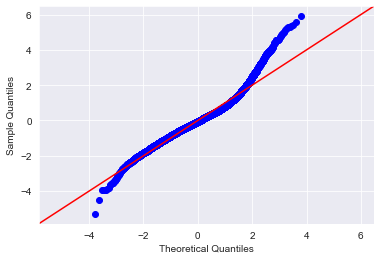

In [42]:
#CHECKING IF RESIDUALS ARE NORMALLY DISTRIBUTED
fig = sm.graphics.qqplot(model_2.resid, dist=stats.norm, line='45', fit=True)

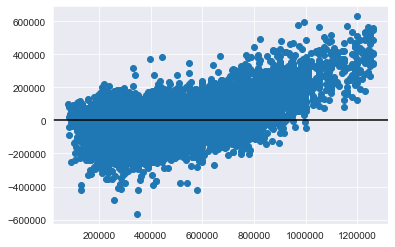

In [43]:
#CHECKING FOR HOMOSCEDACITY
plt.scatter(train_df_2['price'],model_2.resid)
plt.axhline(0,color='black')

**ANALYSIS**

By adding more features to the model, the R^2 value increased to 0.725, which means it can explain 72.5% of variability in house prices. With the extra features, it became more complex and it is fairly difficult to interpret which features are the most important because the data isn't scaled.

# MODEL 3 - DROPPING MULTICOLINEAR COLUMNS (CORR>0.75)

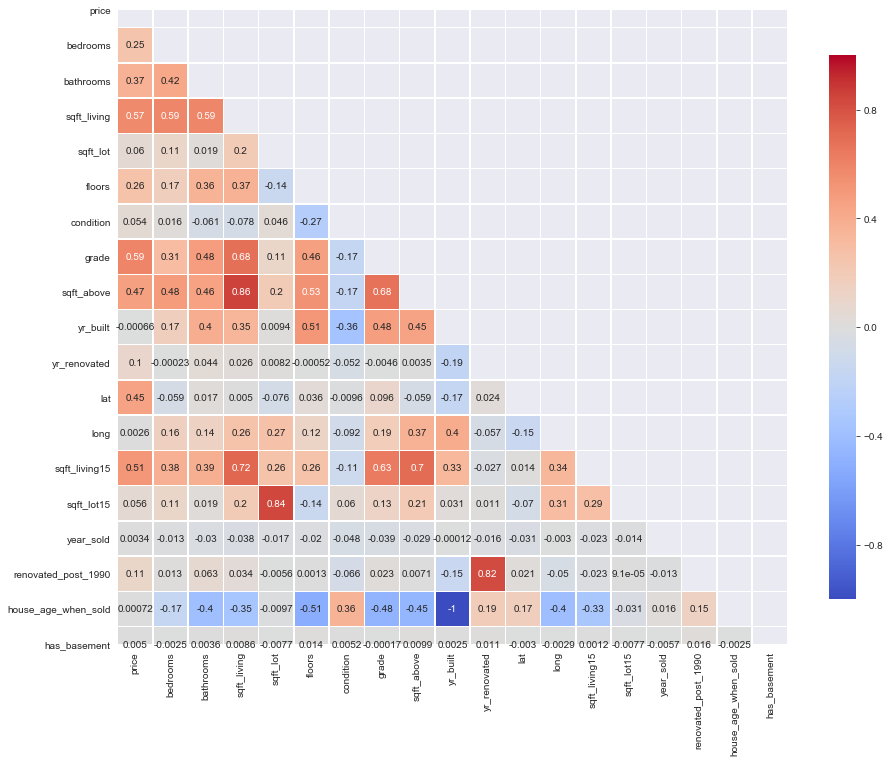

In [44]:
#CORRELATION HEATMAP
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 20))

sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, center=0,
            square=True, linewidths=.5,annot=True, cbar_kws={"shrink": .5});

In [45]:
#DROPPING COLUMNS NOT BEING USED IN MODEL
model3_df = df.drop(['lat','long','zipcode','date'],axis = 1)

#DROPPING COLUMNS WITH HIGH CORRELATION
model3_df = model3_df.drop(['sqft_above','yr_renovated','yr_built','sqft_lot15','sqft_living15'],axis = 1)

# #STARDADIZING DATA EXCEPT TARGET (PRICE) AND CATEGORICAL COLUMNS
# for col in model3_df.drop(['Sub_Region','waterfront','price'],axis=1).columns:
#     model3_df[col] = stats.zscore(model3_df[col])


# model3_df

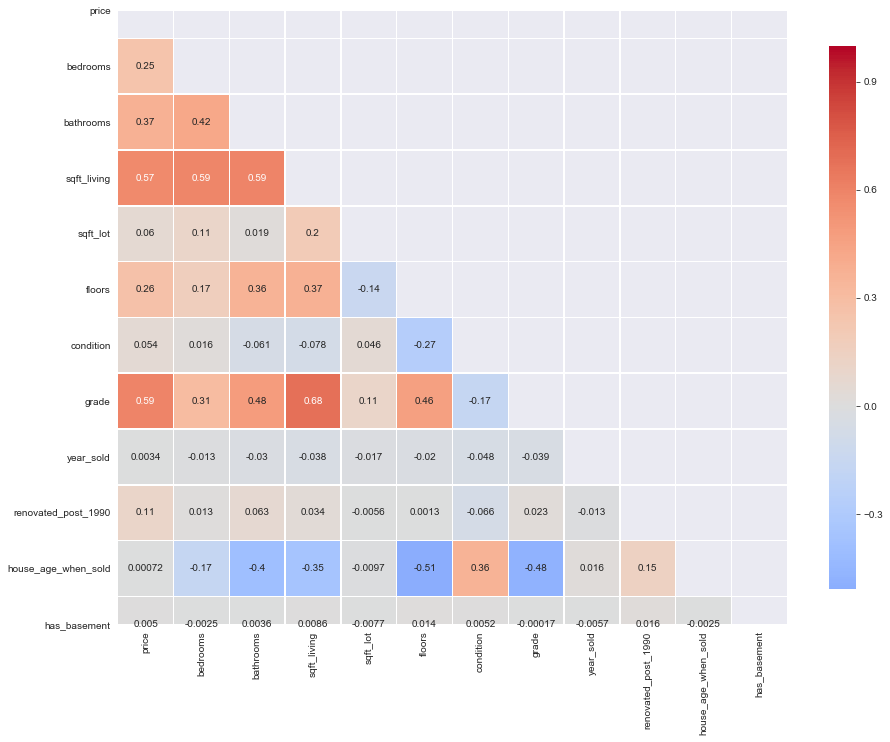

In [46]:
#CORRELATION HEATMAP
corr = model3_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 20))

sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, center=0,
            square=True, linewidths=.5,annot=True, cbar_kws={"shrink": .5});

In [47]:
#HOT ENCODING
dummies = pd.get_dummies(model3_df[categories],prefix = categories,drop_first = True)
df_preprocessed_3 = model3_df.drop(categories,axis = 1)
df_preprocessed_3 = pd.concat([df_preprocessed_3,dummies],axis = 1)
df_preprocessed_3

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,year_sold,renovated_post_1990,house_age_when_sold,has_basement,Sub_Region_East_Urban,Sub_Region_North,Sub_Region_North_and_Seattle,Sub_Region_Seattle,Sub_Region_South_Rural,Sub_Region_South_Urban,Sub_Region_South_and_Seattle,Sub_Region_Vashon_Island,Sub_Region_West,waterfront_1
0,221900.0,3,1,1180,5650,1.0,3,7,2014,0,59,0,0,0,0,0,0,1,0,0,0,0
1,538000.0,3,2,2570,7242,2.0,3,7,2014,1,63,1,0,0,0,1,0,0,0,0,0,0
2,180000.0,2,1,770,10000,1.0,3,6,2015,0,82,0,0,1,0,0,0,0,0,0,0,0
3,604000.0,4,3,1960,5000,1.0,5,7,2014,0,49,1,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2,1680,8080,1.0,3,8,2015,0,28,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2,1530,1131,3.0,3,8,2014,0,5,0,0,0,0,1,0,0,0,0,0,0
21593,400000.0,4,2,2310,5813,2.0,3,8,2015,0,1,0,0,0,0,0,0,0,1,0,0,0
21594,402101.0,2,1,1020,1350,2.0,3,7,2014,0,5,0,0,0,0,1,0,0,0,0,0,0
21595,400000.0,3,2,1600,2388,2.0,3,8,2015,0,11,0,1,0,0,0,0,0,0,0,0,0


In [48]:
#DEFINING TARGET AND PREDICTORS
y = 'price'
df_predictors_3 = df_preprocessed_3.drop('price',axis = 1)
X_3 = list(df_predictors_3.columns)

In [49]:
#TEST-TRAIN SPLIT
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(df_preprocessed_3[X_3], df_preprocessed_3[y], test_size=0.25, random_state=69)
print(len(X_train_3), len(X_test_3), len(y_train_3), len(y_test_3))

13710 4570 13710 4570


In [50]:
#COMBINING XTRAIN YTRAIN AND XTEST YTEST
train_df_3 = pd.concat([y_train_3,X_train_3],axis=1)
test_df_3 = pd.concat([y_test_3,X_test_3],axis=1)

In [51]:
#FITTING MODEL
predictors_3 = '+'.join(X_train_3.columns)
formula = y + '~' + predictors_3
model_3 = ols(formula=formula, data=train_df_3).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     1650.
Date:                Thu, 06 Aug 2020   Prob (F-statistic):               0.00
Time:                        18:45:08   Log-Likelihood:            -1.7844e+05
No. Observations:               13710   AIC:                         3.569e+05
Df Residuals:                   13688   BIC:                         3.571e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                    -4.641e+07   4.02e+06    -11.555      0.000   -5.43e+07   -3.85e+07
bedrooms                     -1.333e+04   1553.793     -8.578      0.000   -1.64e+04   -1.03e+04
bathrooms                     1.255e+04   2007.063      6.251      0.000    8611.391    1.65e+04
sqft_living                    123.6684      2.590     47.754      0.000     118.592     128.745
sqft_lot                         0.4780      0.116      4.108      0.000       0.250       0.706
floors                        1.375e+04   2264.809      6.072      0.000    9313.000    1.82e+04
condition                     2.375e+04   1600.533     14.836      0.000    2.06e+04    2.69e+04
grade                         7.672e+04   1528.594     50.189      0.000    7.37e+04    7.97e+04
year_sold                     2.278e+04   1993.574     11.425      0.000    1.89e+04    2.67e+04
renovated_post_1990           5.497e+04   6824.524      8.055      0.000    4.16e+04    6.83e+04
house_age_when_sold           1565.6995     49.546     31.601      0.000    1468.583    1662.816
has_basement                  5.233e+04   2.81e+04      1.862      0.063   -2762.250    1.07e+05
Sub_Region_East_Urban         1.124e+05   5171.662     21.735      0.000    1.02e+05    1.23e+05
Sub_Region_North              1.264e+04   6133.198      2.061      0.039     620.684    2.47e+04
Sub_Region_North_and_Seattle  2.479e+04   6908.910      3.588      0.000    1.12e+04    3.83e+04
Sub_Region_Seattle            1.115e+05   5401.653     20.644      0.000    1.01e+05    1.22e+05
Sub_Region_South_Rural       -7.784e+04   6611.481    -11.773      0.000   -9.08e+04   -6.49e+04
Sub_Region_South_Urban       -1.003e+05   5110.571    -19.627      0.000    -1.1e+05   -9.03e+04
Sub_Region_South_and_Seattle  -2.45e+04   9035.304     -2.712      0.007   -4.22e+04   -6794.036
Sub_Region_Vashon_Island     -5.619e+04    1.9e+04     -2.960      0.003   -9.34e+04    -1.9e+04
Sub_Region_West               1.227e+04   1.31e+04      0.939      0.348   -1.33e+04    3.79e+04
waterfront_1                  3.013e+05   1.74e+04     17.282      0.000    2.67e+05    3.35e+05
==============================================================================
Omnibus:                     1979.002   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5789.206
Skew:                           0.769   Prob(JB):                         0.00
Kurtosis:                       5.787   Cond. No.                     5.65e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.65e+07. This might indicate that there are
s

In [52]:
#REMOVING FEATURES WITH P-VALUE > 0.05
summary_3 = model_3.summary()
p_table_3 = summary_3.tables[1]
p_table_3 = pd.DataFrame(p_table_3.data)
p_table_3.columns = p_table_3.iloc[0]
p_table_3 = p_table_3.drop(0)
p_table_3 = p_table_3.set_index(p_table_3.columns[0])
p_table_3['P>|t|'] = p_table_3['P>|t|'].astype(float)
x_cols_3 = list(p_table_3[p_table_3['P>|t|'] < 0.05].index)
x_cols_3.remove('Intercept')
print(len(p_table_3), len(x_cols_3))

22 19


In [53]:
#FITTING REVISED MODEL
predictors_3 = '+'.join(x_cols_3)
formula = y + '~' + predictors_3
model_3 = ols(formula=formula, data=train_df_3).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     1824.
Date:                Thu, 06 Aug 2020   Prob (F-statistic):               0.00
Time:                        18:45:08   Log-Likelihood:            -1.7844e+05
No. Observations:               13710   AIC:                         3.569e+05
Df Residuals:                   13690   BIC:                         3.571e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                    -4.637e+07   4.02e+06    -11.546      0.000   -5.42e+07   -3.85e+07
bedrooms                     -1.333e+04   1553.917     -8.580      0.000   -1.64e+04   -1.03e+04
bathrooms                     1.248e+04   2006.877      6.221      0.000    8550.053    1.64e+04
sqft_living                    123.6381      2.590     47.745      0.000     118.562     128.714
sqft_lot                         0.4937      0.115      4.293      0.000       0.268       0.719
floors                        1.376e+04   2264.747      6.074      0.000    9317.696    1.82e+04
condition                     2.378e+04   1600.552     14.857      0.000    2.06e+04    2.69e+04
grade                         7.684e+04   1523.397     50.440      0.000    7.39e+04    7.98e+04
year_sold                     2.276e+04   1993.727     11.415      0.000    1.89e+04    2.67e+04
renovated_post_1990           5.505e+04   6823.977      8.067      0.000    4.17e+04    6.84e+04
house_age_when_sold           1565.6098     49.542     31.602      0.000    1468.500    1662.719
Sub_Region_East_Urban         1.109e+05   4880.919     22.715      0.000    1.01e+05     1.2e+05
Sub_Region_North              1.105e+04   5890.957      1.876      0.061    -493.123    2.26e+04
Sub_Region_North_and_Seattle  2.338e+04   6714.807      3.482      0.000    1.02e+04    3.65e+04
Sub_Region_Seattle            1.101e+05   5169.490     21.303      0.000       1e+05     1.2e+05
Sub_Region_South_Rural       -7.937e+04   6408.125    -12.386      0.000   -9.19e+04   -6.68e+04
Sub_Region_South_Urban       -1.018e+05   4839.094    -21.033      0.000   -1.11e+05   -9.23e+04
Sub_Region_South_and_Seattle -2.597e+04   8894.984     -2.920      0.004   -4.34e+04   -8536.764
Sub_Region_Vashon_Island     -5.801e+04   1.89e+04     -3.072      0.002    -9.5e+04    -2.1e+04
waterfront_1                  3.011e+05   1.74e+04     17.271      0.000    2.67e+05    3.35e+05
==============================================================================
Omnibus:                     1971.964   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5756.248
Skew:                           0.767   Prob(JB):                         0.00
Kurtosis:                       5.779   Cond. No.                     5.65e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.65e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
#REMOVING SCIENTIFIC NOTATION
pd.set_option('display.float_format', lambda x: '%.5f' % x)

#GETTING COEF VALUES
model_3.params.sort_values()


Intercept                      -46371439.63900
Sub_Region_South_Urban           -101778.66200
Sub_Region_South_Rural            -79372.47261
Sub_Region_Vashon_Island          -58011.36463
Sub_Region_South_and_Seattle      -25972.15331
bedrooms                          -13332.04388
sqft_lot                               0.49370
sqft_living                          123.63812
house_age_when_sold                 1565.60977
Sub_Region_North                   11053.96162
bathrooms                          12483.80817
floors                             13756.91094
year_sold                          22758.80424
Sub_Region_North_and_Seattle       23380.46255
condition                          23780.01494
renovated_post_1990                55051.74095
grade                              76839.81649
Sub_Region_Seattle                110127.24842
Sub_Region_East_Urban             110869.10487
waterfront_1                      301076.07085
dtype: float64

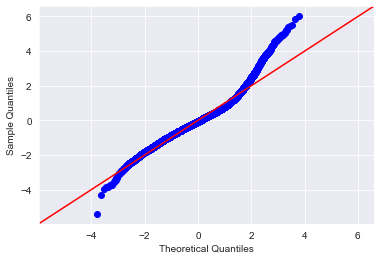

In [55]:
#CHECKING IF RESIDUALS ARE NORMALLY DISTRIBUTED
fig = sm.graphics.qqplot(model_3.resid, dist=stats.norm, line='45', fit=True)

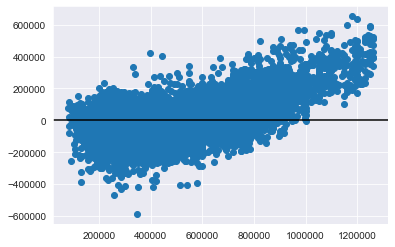

In [56]:
#CHECKING FOR HOMOSCEDACITY
plt.scatter(train_df_3['price'],model_3.resid)
plt.axhline(0,color='black')

In [57]:
#FITTING MODEL WITH TEST DATA
predictors_3 = '+'.join(X_train_3.columns)
formula = y + '~' + predictors_3
model_3_test = ols(formula=formula, data=test_df_3).fit()
model_3_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     550.8
Date:                Thu, 06 Aug 2020   Prob (F-statistic):               0.00
Time:                        18:45:09   Log-Likelihood:                -59590.
No. Observations:                4570   AIC:                         1.192e+05
Df Residuals:                    4548   BIC:                         1.194e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                     -4.23e+07   7.14e+06     -5.921      0.000   -5.63e+07   -2.83e+07
bedrooms                     -8796.2536   2748.878     -3.200      0.001   -1.42e+04   -3407.117
bathrooms                     1.553e+04   3548.833      4.377      0.000    8574.251    2.25e+04
sqft_living                    125.6593      4.542     27.667      0.000     116.755     134.563
sqft_lot                         0.4548      0.198      2.297      0.022       0.067       0.843
floors                         1.27e+04   4110.640      3.090      0.002    4641.569    2.08e+04
condition                     2.959e+04   2838.753     10.422      0.000     2.4e+04    3.52e+04
grade                          7.14e+04   2660.221     26.841      0.000    6.62e+04    7.66e+04
year_sold                     2.074e+04   3545.875      5.850      0.000    1.38e+04    2.77e+04
renovated_post_1990           4.973e+04   1.23e+04      4.043      0.000    2.56e+04    7.38e+04
house_age_when_sold           1395.5263     89.153     15.653      0.000    1220.744    1570.309
has_basement                 -5.389e+04   3.74e+04     -1.442      0.149   -1.27e+05    1.94e+04
Sub_Region_East_Urban         1.086e+05   9650.729     11.257      0.000    8.97e+04    1.28e+05
Sub_Region_North              3041.8745   1.13e+04      0.269      0.788   -1.91e+04    2.52e+04
Sub_Region_North_and_Seattle  1.586e+04   1.25e+04      1.266      0.206   -8697.030    4.04e+04
Sub_Region_Seattle             1.12e+05      1e+04     11.157      0.000    9.23e+04    1.32e+05
Sub_Region_South_Rural       -9.303e+04   1.19e+04     -7.798      0.000   -1.16e+05   -6.96e+04
Sub_Region_South_Urban         -1.1e+05   9486.655    -11.596      0.000   -1.29e+05   -9.14e+04
Sub_Region_South_and_Seattle -1.922e+04   1.71e+04     -1.126      0.260   -5.27e+04    1.42e+04
Sub_Region_Vashon_Island      5682.7934   2.66e+04      0.213      0.831   -4.65e+04    5.79e+04
Sub_Region_West               2.319e+04   2.01e+04      1.155      0.248   -1.62e+04    6.26e+04
waterfront_1                  1.889e+05   3.04e+04      6.210      0.000    1.29e+05    2.48e+05
==============================================================================
Omnibus:                      925.033   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3418.970
Skew:                           0.976   Prob(JB):                         0.00
Kurtosis:                       6.761   Cond. No.                     5.82e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.82e+07. This might indicate that there are
s

In [58]:
#REMOVING FEATURES WITH P-VALUE > 0.05
summary_3_test = model_3_test.summary()
p_table_3_test = summary_3_test.tables[1]
p_table_3_test = pd.DataFrame(p_table_3_test.data)
p_table_3_test.columns = p_table_3_test.iloc[0]
p_table_3_test = p_table_3_test.drop(0)
p_table_3_test = p_table_3_test.set_index(p_table_3_test.columns[0])
p_table_3_test['P>|t|'] = p_table_3_test['P>|t|'].astype(float)
x_cols_3_test = list(p_table_3_test[p_table_3_test['P>|t|'] < 0.05].index)
x_cols_3_test.remove('Intercept')
print(len(p_table_3_test), len(x_cols_3_test))

22 15


In [59]:
#FITTING REVISED TEST MODEL
predictors_3_test = '+'.join(x_cols_3_test)
formula = y + '~' + predictors_3_test
model_3_test = ols(formula=formula, data=test_df_3).fit()
model_3_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     770.3
Date:                Thu, 06 Aug 2020   Prob (F-statistic):               0.00
Time:                        18:45:09   Log-Likelihood:                -59594.
No. Observations:                4570   AIC:                         1.192e+05
Df Residuals:                    4554   BIC:                         1.193e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -4.213e+07   7.14e+06     -5.899      0.000   -5.61e+07   -2.81e+07
bedrooms               -8721.5930   2743.264     -3.179      0.001   -1.41e+04   -3343.466
bathrooms               1.549e+04   3543.700      4.372      0.000    8544.415    2.24e+04
sqft_living              125.0346      4.531     27.596      0.000     116.152     133.917
sqft_lot                   0.4900      0.190      2.575      0.010       0.117       0.863
floors                  1.244e+04   4094.390      3.038      0.002    4411.137    2.05e+04
condition               2.981e+04   2827.757     10.543      0.000    2.43e+04    3.54e+04
grade                    7.21e+04   2633.767     27.376      0.000    6.69e+04    7.73e+04
year_sold               2.066e+04   3545.086      5.828      0.000    1.37e+04    2.76e+04
renovated_post_1990     4.982e+04   1.23e+04      4.053      0.000    2.57e+04    7.39e+04
house_age_when_sold     1395.8297     88.370     15.795      0.000    1222.582    1569.078
Sub_Region_East_Urban   1.037e+05   5537.822     18.724      0.000    9.28e+04    1.15e+05
Sub_Region_Seattle      1.075e+05   5880.846     18.272      0.000    9.59e+04    1.19e+05
Sub_Region_South_Rural -9.778e+04   9141.114    -10.697      0.000   -1.16e+05   -7.99e+04
Sub_Region_South_Urban -1.148e+05   5282.838    -21.726      0.000   -1.25e+05   -1.04e+05
waterfront_1             1.89e+05      3e+04      6.303      0.000     1.3e+05    2.48e+05
==============================================================================
Omnibus:                      916.060   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3395.583
Skew:                           0.965   Prob(JB):                         0.00
Kurtosis:                       6.756   Cond. No.                     5.82e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.82e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
#GETTING REVISED MODEL COEF
model_3_test.params.sort_values()

Intercept                -42134112.75601
Sub_Region_South_Urban     -114776.17029
Sub_Region_South_Rural      -97778.42855
bedrooms                     -8721.59297
sqft_lot                         0.49003
sqft_living                    125.03459
house_age_when_sold           1395.82967
floors                       12438.12744
bathrooms                    15491.78584
year_sold                    20660.21478
condition                    29812.65749
renovated_post_1990          49816.52821
grade                        72101.60708
Sub_Region_East_Urban       103691.61503
Sub_Region_Seattle          107455.96037
waterfront_1                188991.12452
dtype: float64

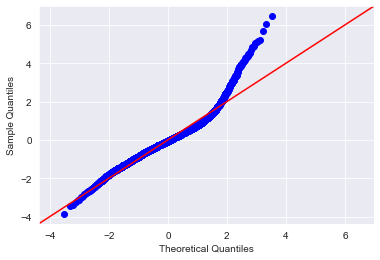

In [61]:
#CHECKING IF RESIDUALS ARE NORMALLY DISTRIBUTED
fig = sm.graphics.qqplot(model_3_test.resid, dist=stats.norm, line='45', fit=True)

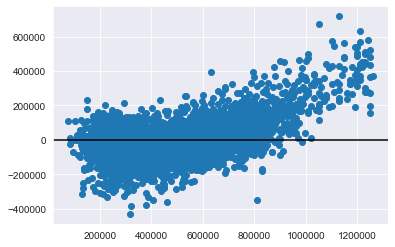

In [62]:
#CHECKING FOR HOMOSCEDACITY
plt.scatter(test_df_3['price'],model_3_test.resid)
plt.axhline(0,color='black')

**ANALYSIS**

By removing multicolinear columns,the R^2 value dropped by 1% to 71.7%, but by doing so, the model became simpler and the condition number dropped to an acceptable level.The test model confirmed the validity of the model, with both the train and test models varying by less than 1%. The residuals aren't completely normally distributed with the model having difficulties with high priced houses.

# 1 - WHICH CREATES A BETTER MODEL, ZIPCODES OR SUB REGIONS?

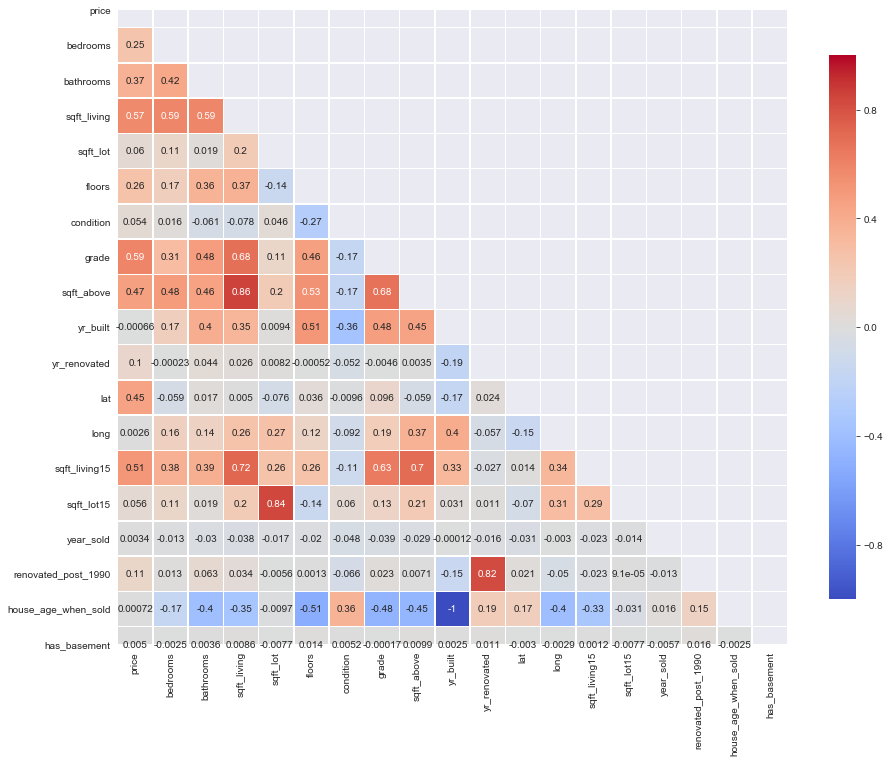

In [63]:
#CORRELATION HEATMAP
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 20))

sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, center=0,
            square=True, linewidths=.5,annot=True, cbar_kws={"shrink": .5});

In [64]:
#DROPPING COLUMNS NOT BEING USED IN MODEL
model6_df = df.drop(['lat','long','Sub_Region','date'],axis = 1)

#DROPPING COLUMNS WITH HIGH CORRELATION
model6_df = model6_df.drop(['sqft_above','yr_renovated','yr_built','sqft_lot15','sqft_living15'],axis = 1)
    
model6_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,zipcode,year_sold,renovated_post_1990,house_age_when_sold,has_basement
0,221900.00000,3,1,1180,5650,1.00000,0,3,7,98178,2014,0,59,0
1,538000.00000,3,2,2570,7242,2.00000,0,3,7,98125,2014,1,63,1
2,180000.00000,2,1,770,10000,1.00000,0,3,6,98028,2015,0,82,0
3,604000.00000,4,3,1960,5000,1.00000,0,5,7,98136,2014,0,49,1
4,510000.00000,3,2,1680,8080,1.00000,0,3,8,98074,2015,0,28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.00000,3,2,1530,1131,3.00000,0,3,8,98103,2014,0,5,0
21593,400000.00000,4,2,2310,5813,2.00000,0,3,8,98146,2015,0,1,0
21594,402101.00000,2,1,1020,1350,2.00000,0,3,7,98144,2014,0,5,0
21595,400000.00000,3,2,1600,2388,2.00000,0,3,8,98027,2015,0,11,0


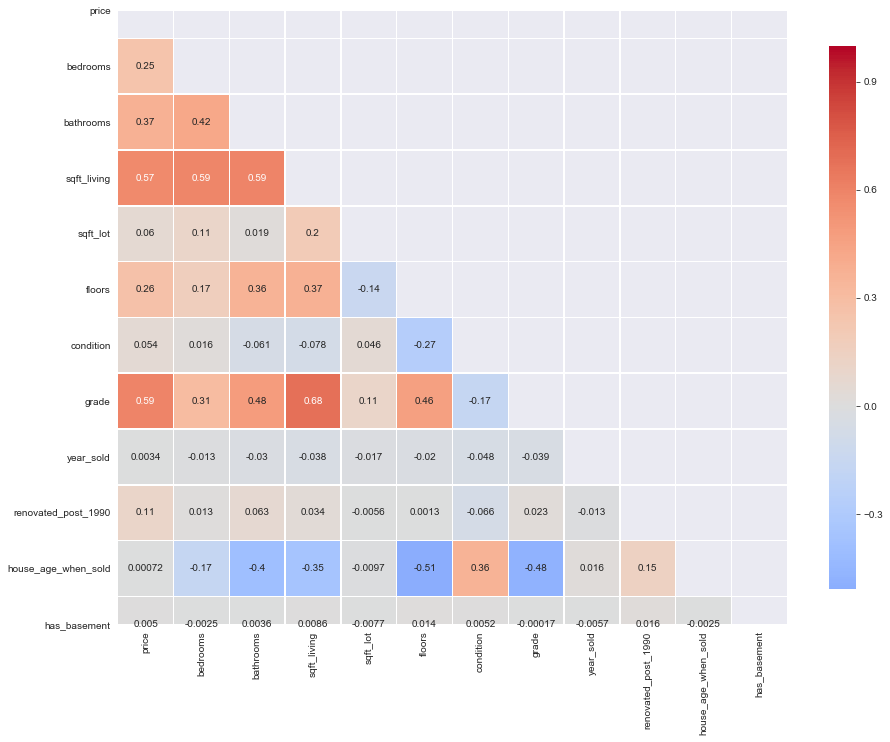

In [65]:
#CORRELATION HEATMAP
corr = model6_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 20))

sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, center=0,
            square=True, linewidths=.5,annot=True, cbar_kws={"shrink": .5});

In [66]:
# #TURNING COLUMNS TO STRING FOR HOT ENCODING
categories_2 = ['zipcode','waterfront']

#HOT ENCODING
dummies = pd.get_dummies(model6_df[categories_2],prefix = categories_2,drop_first = True)
df_preprocessed_6 = model6_df.drop(categories_2,axis = 1)
df_preprocessed_6 = pd.concat([df_preprocessed_6,dummies],axis = 1)
df_preprocessed_6

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,year_sold,renovated_post_1990,house_age_when_sold,has_basement,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,...,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,waterfront_1
0,221900.00000,3,1,1180,5650,1.00000,3,7,2014,0,59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,538000.00000,3,2,2570,7242,2.00000,3,7,2014,1,63,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,180000.00000,2,1,770,10000,1.00000,3,6,2015,0,82,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,604000.00000,4,3,1960,5000,1.00000,5,7,2014,0,49,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,510000.00000,3,2,1680,8080,1.00000,3,8,2015,0,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.00000,3,2,1530,1131,3.00000,3,8,2014,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21593,400000.00000,4,2,2310,5813,2.00000,3,8,2015,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
21594,402101.00000,2,1,1020,1350,2.00000,3,7,2014,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
21595,400000.00000,3,2,1600,2388,2.00000,3,8,2015,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [67]:
#DEFINING TARGET AND PREDICTORS
y = 'price'
df_predictors_6 = df_preprocessed_6.drop('price',axis = 1)
X_6 = list(df_predictors_6.columns)

In [68]:
#TRAIN-TEST SPLIT
X_train_6, X_test_6, y_train_6, y_test_6 = train_test_split(df_preprocessed_6[X_6], df_preprocessed_6[y], test_size=0.25, random_state=69)
print(len(X_train_6), len(X_test_6), len(y_train_6), len(y_test_6))

13710 4570 13710 4570


In [69]:
#COMBINING XTRAIN YTRAIN AND XTEST YTEST
train_df_6 = pd.concat([y_train_6,X_train_6],axis=1)
test_df_6 = pd.concat([y_test_6,X_test_6],axis=1)

In [70]:
#FITTING MODEL
predictors_6 = '+'.join(X_train_6.columns)
formula = y + '~' + predictors_6
model_6 = ols(formula=formula, data=train_df_6).fit()
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     737.4
Date:                Thu, 06 Aug 2020   Prob (F-statistic):               0.00
Time:                        18:45:12   Log-Likelihood:            -1.7555e+05
No. Observations:               13710   AIC:                         3.513e+05
Df Residuals:                   13628   BIC:                         3.519e+05
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -5.153e+07   3.27e+06    -15.757      0.000   -5.79e+07   -4.51e+07
bedrooms            -7892.0935   1276.248     -6.184      0.000   -1.04e+04   -5390.471
bathrooms            4156.9150   1645.124      2.527      0.012     932.245    7381.585
sqft_living           132.4422      2.150     61.601      0.000     128.228     136.657
sqft_lot                1.0965      0.099     11.131      0.000       0.903       1.290
floors                719.7034   1911.394      0.377      0.707   -3026.892    4466.299
condition            2.159e+04   1330.056     16.230      0.000     1.9e+04    2.42e+04
grade                5.596e+04   1304.177     42.907      0.000    5.34e+04    5.85e+04
year_sold            2.535e+04   1623.538     15.615      0.000    2.22e+04    2.85e+04
renovated_post_1990   5.14e+04   5564.330      9.237      0.000    4.05e+04    6.23e+04
house_age_when_sold   700.8489     43.108     16.258      0.000     616.350     785.347
has_basement         2.722e+04   2.29e+04      1.190      0.234   -1.76e+04     7.2e+04
zipcode_98002        7992.4665   9171.758      0.871      0.384   -9985.445     2.6e+04
zipcode_98003       -3470.3666   8399.232     -0.413      0.679   -1.99e+04     1.3e+04
zipcode_98004        5.143e+05   9807.153     52.437      0.000    4.95e+05    5.33e+05
zipcode_98005        3.324e+05   1.08e+04     30.833      0.000    3.11e+05    3.54e+05
zipcode_98006         2.66e+05   8058.606     33.008      0.000     2.5e+05    2.82e+05
zipcode_98007         2.52e+05   1.09e+04     23.130      0.000    2.31e+05    2.73e+05
zipcode_98008        2.395e+05   8557.355     27.988      0.000    2.23e+05    2.56e+05
zipcode_98010        8.087e+04   1.35e+04      5.970      0.000    5.43e+04    1.07e+05
zipcode_98011        1.473e+05   9522.825     15.469      0.000    1.29e+05    1.66e+05
zipcode_98014        9.415e+04   1.36e+04      6.944      0.000    6.76e+04    1.21e+05
zipcode_98019        9.313e+04   1.01e+04      9.257      0.000    7.34e+04    1.13e+05
zipcode_98022        1.044e+04   9514.705      1.097      0.273   -8213.907    2.91e+04
zipcode_98023       -2.088e+04   7256.521     -2.877      0.004   -3.51e+04   -6652.096
zipcode_98024        1.234e+05   1.76e+04      7.015      0.000    8.89e+04    1.58e+05
zipcode_98027         2.01e+05   8142.918     24.687      0.000    1.85e+05    2.17e+05
zipcode_98028        1.323e+05   8539.247     15.491      0.000    1.16e+05    1.49e+05
zipcode_98029        2.234e+05   8090.826     27.606      0.000    2.07e+05    2.39e+05
zipcode_98030         676.8115   8684.268      0.078      0.938   -1.63e+04    1.77e+04
zipcode_98031        6867.1186   8483.642      0.809      0.418   -9761.992    2.35e+04
zipcode_98032         771.0134   1.14e+04      0.068      0.946   -2.16e+04    2.32e+04
zip

In [71]:
#REMOVING FEATURES WITH P-VALUE > 0.05
summary_6 = model_6.summary()
p_table_6 = summary_6.tables[1]
p_table_6 = pd.DataFrame(p_table_6.data)
p_table_6.columns = p_table_6.iloc[0]
p_table_6 = p_table_6.drop(0)
p_table_6 = p_table_6.set_index(p_table_6.columns[0])
p_table_6['P>|t|'] = p_table_6['P>|t|'].astype(float)
x_cols_6 = list(p_table_6[p_table_6['P>|t|'] < 0.05].index)
x_cols_6.remove('Intercept')
print(len(p_table_6), len(x_cols_6))

82 72


In [72]:
#FTTING REVISED MODEL
predictors_6 = '+'.join(x_cols_6)
formula = y + '~' + predictors_6
model_6 = ols(formula=formula, data=train_df_6).fit()
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     829.7
Date:                Thu, 06 Aug 2020   Prob (F-statistic):               0.00
Time:                        18:45:12   Log-Likelihood:            -1.7555e+05
No. Observations:               13710   AIC:                         3.512e+05
Df Residuals:                   13637   BIC:                         3.518e+05
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -5.157e+07   3.27e+06    -15.774      0.000    -5.8e+07   -4.52e+07
bedrooms            -7887.3361   1275.361     -6.184      0.000   -1.04e+04   -5387.453
bathrooms            4129.8375   1644.066      2.512      0.012     907.242    7352.433
sqft_living           132.6221      2.129     62.291      0.000     128.449     136.795
sqft_lot                1.0928      0.098     11.178      0.000       0.901       1.284
condition            2.174e+04   1323.062     16.430      0.000    1.91e+04    2.43e+04
grade                5.589e+04   1293.590     43.203      0.000    5.34e+04    5.84e+04
year_sold            2.537e+04   1622.977     15.634      0.000    2.22e+04    2.86e+04
renovated_post_1990  5.188e+04   5555.505      9.339      0.000     4.1e+04    6.28e+04
house_age_when_sold   689.7393     39.597     17.419      0.000     612.123     767.356
zipcode_98004        5.105e+05   8428.953     60.566      0.000    4.94e+05    5.27e+05
zipcode_98005        3.283e+05   9548.381     34.384      0.000     3.1e+05    3.47e+05
zipcode_98006        2.619e+05   6306.389     41.536      0.000     2.5e+05    2.74e+05
zipcode_98007        2.483e+05   9666.060     25.683      0.000    2.29e+05    2.67e+05
zipcode_98008        2.354e+05   6928.939     33.972      0.000    2.22e+05    2.49e+05
zipcode_98010        7.688e+04   1.26e+04      6.097      0.000    5.22e+04    1.02e+05
zipcode_98011        1.433e+05   8112.145     17.667      0.000    1.27e+05    1.59e+05
zipcode_98014        9.016e+04   1.26e+04      7.135      0.000    6.54e+04    1.15e+05
zipcode_98019        8.921e+04   8742.132     10.204      0.000    7.21e+04    1.06e+05
zipcode_98023       -2.491e+04   5253.631     -4.742      0.000   -3.52e+04   -1.46e+04
zipcode_98024        1.196e+05   1.69e+04      7.086      0.000    8.65e+04    1.53e+05
zipcode_98027        1.971e+05   6433.034     30.642      0.000    1.85e+05     2.1e+05
zipcode_98028        1.283e+05   6934.200     18.499      0.000    1.15e+05    1.42e+05
zipcode_98029        2.195e+05   6337.976     34.639      0.000    2.07e+05    2.32e+05
zipcode_98033        3.242e+05   6016.761     53.885      0.000    3.12e+05    3.36e+05
zipcode_98034        1.839e+05   5122.360     35.903      0.000    1.74e+05    1.94e+05
zipcode_98038        3.832e+04   5134.711      7.464      0.000    2.83e+04    4.84e+04
zipcode_98039        6.504e+05   3.61e+04     17.998      0.000     5.8e+05    7.21e+05
zipcode_98040         4.35e+05   9228.233     47.140      0.000    4.17e+05    4.53e+05
zipcode_98045        9.972e+04   7574.652     13.165      0.000    8.49e+04    1.15e+05
zipcode_98052        2.439e+05   5053.499     48.268      0.000    2.34e+05    2.54e+05
zipcode_98053        2.406e+05   6370.692     37.771      0.000    2.28e+05    2.53e+05
zip

In [73]:
#GETTING MODEL COEF
model_6.params.sort_values()

Intercept       -51573471.81038
zipcode_98092      -26067.61965
zipcode_98023      -24911.54523
bedrooms            -7887.33613
sqft_lot                1.09281
                      ...      
zipcode_98109      414497.25495
zipcode_98040      435015.06940
zipcode_98112      435643.07601
zipcode_98004      510508.32469
zipcode_98039      650359.50565
Length: 73, dtype: float64

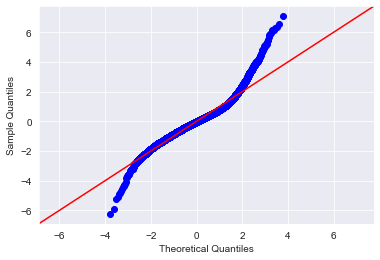

In [74]:
#CHECKING IF RESIDUALS ARE NORMALLY DISTRIBUTED
fig = sm.graphics.qqplot(model_6.resid, dist=stats.norm, line='45', fit=True)

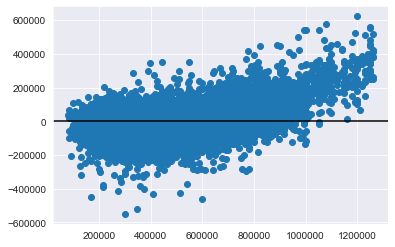

In [75]:
#CHECKING FOR HOMOSCEDACITY
plt.scatter(train_df_6['price'],model_6.resid)
plt.axhline(0,color='black')

In [76]:
#FITTING MODEL WITH TEST DATA
predictors_6 = '+'.join(X_train_6.columns)
formula = y + '~' + predictors_6
model_6_test = ols(formula=formula, data=test_df_6).fit()
model_6_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     258.4
Date:                Thu, 06 Aug 2020   Prob (F-statistic):               0.00
Time:                        18:45:13   Log-Likelihood:                -58518.
No. Observations:                4570   AIC:                         1.172e+05
Df Residuals:                    4488   BIC:                         1.177e+05
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -4.521e+07   5.74e+06     -7.875      0.000   -5.65e+07    -3.4e+07
bedrooms            -4927.5642   2227.787     -2.212      0.027   -9295.125    -560.003
bathrooms            7878.6954   2865.870      2.749      0.006    2260.178    1.35e+04
sqft_living           134.1618      3.722     36.041      0.000     126.864     141.460
sqft_lot                0.8776      0.165      5.320      0.000       0.554       1.201
floors              -2434.3858   3426.297     -0.711      0.477   -9151.615    4282.844
condition            2.281e+04   2342.814      9.736      0.000    1.82e+04    2.74e+04
grade                5.231e+04   2208.399     23.689      0.000     4.8e+04    5.66e+04
year_sold            2.222e+04   2849.496      7.797      0.000    1.66e+04    2.78e+04
renovated_post_1990  5.531e+04   9912.681      5.579      0.000    3.59e+04    7.47e+04
house_age_when_sold   529.1403     76.350      6.930      0.000     379.457     678.824
has_basement        -2.392e+04      3e+04     -0.796      0.426   -8.28e+04     3.5e+04
zipcode_98002        1.503e+04   1.73e+04      0.870      0.384   -1.88e+04    4.89e+04
zipcode_98003       -3042.5866   1.46e+04     -0.208      0.835   -3.17e+04    2.56e+04
zipcode_98004         6.13e+05   1.79e+04     34.216      0.000    5.78e+05    6.48e+05
zipcode_98005        3.207e+05   1.85e+04     17.335      0.000    2.84e+05    3.57e+05
zipcode_98006        2.761e+05   1.38e+04     19.974      0.000    2.49e+05    3.03e+05
zipcode_98007        2.541e+05   1.91e+04     13.300      0.000    2.17e+05    2.92e+05
zipcode_98008        2.333e+05   1.59e+04     14.683      0.000    2.02e+05    2.65e+05
zipcode_98010        7.516e+04   2.32e+04      3.233      0.001    2.96e+04    1.21e+05
zipcode_98011         1.43e+05    1.7e+04      8.424      0.000     1.1e+05    1.76e+05
zipcode_98014        1.115e+05   2.18e+04      5.109      0.000    6.87e+04    1.54e+05
zipcode_98019         1.11e+05   1.71e+04      6.498      0.000    7.75e+04    1.44e+05
zipcode_98022        6491.4535   1.77e+04      0.366      0.714   -2.83e+04    4.12e+04
zipcode_98023           -2e+04   1.29e+04     -1.551      0.121   -4.53e+04    5279.789
zipcode_98024        1.647e+05   3.13e+04      5.260      0.000    1.03e+05    2.26e+05
zipcode_98027        1.995e+05   1.48e+04     13.518      0.000    1.71e+05    2.28e+05
zipcode_98028        1.341e+05   1.44e+04      9.323      0.000    1.06e+05    1.62e+05
zipcode_98029        2.317e+05    1.5e+04     15.433      0.000    2.02e+05    2.61e+05
zipcode_98030        1.916e+04   1.45e+04      1.319      0.187   -9313.745    4.76e+04
zipcode_98031        2.116e+04   1.44e+04      1.473      0.141   -6999.772    4.93e+04
zipcode_98032         -1.1e+04    1.8e+04     -0.610      0.542   -4.63e+04    2.43e+04
zip

In [77]:
#REMOVING FEATURES WITH P-VALUE > 0.05
summary_6_test = model_6_test.summary()
p_table_6_test = summary_6_test.tables[1]
p_table_6_test = pd.DataFrame(p_table_6_test.data)
p_table_6_test.columns = p_table_6_test.iloc[0]
p_table_6_test = p_table_6_test.drop(0)
p_table_6_test = p_table_6_test.set_index(p_table_6_test.columns[0])
p_table_6_test['P>|t|'] = p_table_6_test['P>|t|'].astype(float)
x_cols_6_test = list(p_table_6_test[p_table_6_test['P>|t|'] < 0.05].index)
x_cols_6_test.remove('Intercept')
print(len(p_table_6_test), len(x_cols_6_test))

82 69


In [78]:
#FITTING REVISED TEST MODEL
predictors_6_test = '+'.join(x_cols_6_test)
formula = y + '~' + predictors_6_test
model_6_test = ols(formula=formula, data=test_df_6).fit()
model_6_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     301.8
Date:                Thu, 06 Aug 2020   Prob (F-statistic):               0.00
Time:                        18:45:13   Log-Likelihood:                -58533.
No. Observations:                4570   AIC:                         1.172e+05
Df Residuals:                    4500   BIC:                         1.177e+05
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -4.534e+07   5.74e+06     -7.899      0.000   -5.66e+07   -3.41e+07
bedrooms            -4851.6569   2228.224     -2.177      0.030   -9220.070    -483.244
bathrooms            8132.9805   2862.326      2.841      0.005    2521.414    1.37e+04
sqft_living           133.3908      3.680     36.251      0.000     126.177     140.605
sqft_lot                0.9096      0.163      5.578      0.000       0.590       1.229
condition            2.327e+04   2325.294     10.006      0.000    1.87e+04    2.78e+04
grade                5.155e+04   2193.442     23.502      0.000    4.73e+04    5.59e+04
year_sold            2.228e+04   2849.118      7.821      0.000    1.67e+04    2.79e+04
renovated_post_1990  5.441e+04   9903.067      5.494      0.000     3.5e+04    7.38e+04
house_age_when_sold   542.7579     70.460      7.703      0.000     404.621     680.895
zipcode_98004        6.114e+05   1.53e+04     40.025      0.000    5.81e+05    6.41e+05
zipcode_98005        3.192e+05    1.6e+04     19.993      0.000    2.88e+05    3.51e+05
zipcode_98006        2.748e+05   1.01e+04     27.116      0.000    2.55e+05    2.95e+05
zipcode_98007        2.525e+05   1.67e+04     15.152      0.000     2.2e+05    2.85e+05
zipcode_98008        2.313e+05   1.28e+04     18.038      0.000    2.06e+05    2.56e+05
zipcode_98010        7.218e+04   2.13e+04      3.384      0.001    3.04e+04    1.14e+05
zipcode_98011        1.414e+05   1.42e+04      9.977      0.000    1.14e+05    1.69e+05
zipcode_98014        1.089e+05   1.98e+04      5.509      0.000    7.01e+04    1.48e+05
zipcode_98019        1.079e+05   1.43e+04      7.531      0.000    7.98e+04    1.36e+05
zipcode_98024        1.623e+05      3e+04      5.413      0.000    1.04e+05    2.21e+05
zipcode_98027        1.974e+05   1.14e+04     17.275      0.000    1.75e+05     2.2e+05
zipcode_98028        1.324e+05   1.09e+04     12.095      0.000    1.11e+05    1.54e+05
zipcode_98029        2.297e+05   1.17e+04     19.596      0.000    2.07e+05    2.53e+05
zipcode_98033        3.211e+05   1.03e+04     31.212      0.000    3.01e+05    3.41e+05
zipcode_98034        1.951e+05   8759.265     22.273      0.000    1.78e+05    2.12e+05
zipcode_98038        3.754e+04   8291.613      4.527      0.000    2.13e+04    5.38e+04
zipcode_98039        7.021e+05   5.16e+04     13.595      0.000    6.01e+05    8.03e+05
zipcode_98040        4.453e+05    1.3e+04     34.310      0.000     4.2e+05    4.71e+05
zipcode_98045        1.125e+05   1.57e+04      7.174      0.000    8.17e+04    1.43e+05
zipcode_98052        2.538e+05   9122.517     27.825      0.000    2.36e+05    2.72e+05
zipcode_98053        2.334e+05   1.25e+04     18.661      0.000    2.09e+05    2.58e+05
zipcode_98055        4.533e+04   1.15e+04      3.952      0.000    2.28e+04    6.78e+04
zip

In [79]:
#GETTING REVISED MODEL COEF
model_6_test.params.sort_values()

Intercept             -45340997.99989
bedrooms                  -4851.65694
sqft_lot                      0.90955
sqft_living                 133.39083
house_age_when_sold         542.75789
                            ...      
zipcode_98119            428155.40900
zipcode_98112            434734.28190
zipcode_98040            445265.14387
zipcode_98004            611447.06580
zipcode_98039            702122.91294
Length: 70, dtype: float64

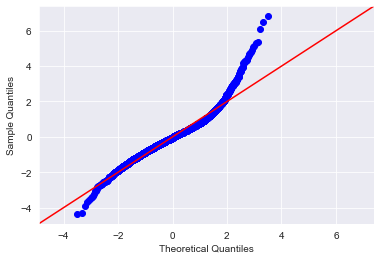

In [80]:
#CHECKING IF RESIDUALS ARE NORMALLY DISTRIBUTED
fig = sm.graphics.qqplot(model_6_test.resid, dist=stats.norm, line='45', fit=True)

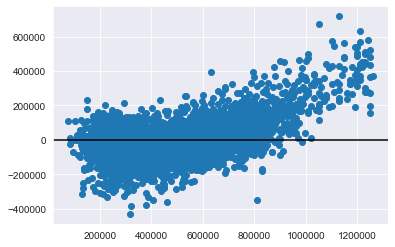

In [81]:
#CHECKING FOR HOMOSCEDACITY
plt.scatter(test_df_6['price'],model_3_test.resid)
plt.axhline(0,color='black')

**ANALYSIS**

By using zip codes instead of sub regions, the R^2 improved drastically from 71.7% to 82.3%. This means that generalizing zip codes into regions did not help the model because there is a high price variation from city to city. The test model confirmed the validity of the model, with both the train and test models varying by 1%.The residuals got worse on the tails, but they still somewhat follow a normal distribution. Removing more outliers does not improve model performance.

# 2 - DOES LOG TRANSFORMING PRICE IMPROVE MODEL?

In [82]:
#DROPPING COLUMNS WITH HIGH CORRELATION AND COLUMNS NOT USED IN MODEL
model4_df = model6_df.copy()
model4_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,zipcode,year_sold,renovated_post_1990,house_age_when_sold,has_basement
0,221900.00000,3,1,1180,5650,1.00000,0,3,7,98178,2014,0,59,0
1,538000.00000,3,2,2570,7242,2.00000,0,3,7,98125,2014,1,63,1
2,180000.00000,2,1,770,10000,1.00000,0,3,6,98028,2015,0,82,0
3,604000.00000,4,3,1960,5000,1.00000,0,5,7,98136,2014,0,49,1
4,510000.00000,3,2,1680,8080,1.00000,0,3,8,98074,2015,0,28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.00000,3,2,1530,1131,3.00000,0,3,8,98103,2014,0,5,0
21593,400000.00000,4,2,2310,5813,2.00000,0,3,8,98146,2015,0,1,0
21594,402101.00000,2,1,1020,1350,2.00000,0,3,7,98144,2014,0,5,0
21595,400000.00000,3,2,1600,2388,2.00000,0,3,8,98027,2015,0,11,0


In [83]:
#HOT ENCODING
dummies = pd.get_dummies(model4_df[categories_2],prefix = categories_2,drop_first = True)
df_preprocessed_4 = model4_df.drop(categories_2,axis = 1)
df_preprocessed_4 = pd.concat([df_preprocessed_4,dummies],axis = 1)
df_preprocessed_4

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,year_sold,renovated_post_1990,house_age_when_sold,has_basement,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,...,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,waterfront_1
0,221900.00000,3,1,1180,5650,1.00000,3,7,2014,0,59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,538000.00000,3,2,2570,7242,2.00000,3,7,2014,1,63,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,180000.00000,2,1,770,10000,1.00000,3,6,2015,0,82,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,604000.00000,4,3,1960,5000,1.00000,5,7,2014,0,49,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,510000.00000,3,2,1680,8080,1.00000,3,8,2015,0,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.00000,3,2,1530,1131,3.00000,3,8,2014,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21593,400000.00000,4,2,2310,5813,2.00000,3,8,2015,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
21594,402101.00000,2,1,1020,1350,2.00000,3,7,2014,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
21595,400000.00000,3,2,1600,2388,2.00000,3,8,2015,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [84]:
#CREATING LOG PRICE COLUMN IN DF
df_preprocessed_4['log_price'] = df_preprocessed_4['price'].map(lambda x :np.log(x))
df_preprocessed_4

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,year_sold,renovated_post_1990,house_age_when_sold,has_basement,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,...,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,waterfront_1,log_price
0,221900.00000,3,1,1180,5650,1.00000,3,7,2014,0,59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,12.30998
1,538000.00000,3,2,2570,7242,2.00000,3,7,2014,1,63,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13.19561
2,180000.00000,2,1,770,10000,1.00000,3,6,2015,0,82,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12.10071
3,604000.00000,4,3,1960,5000,1.00000,5,7,2014,0,49,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,13.31133
4,510000.00000,3,2,1680,8080,1.00000,3,8,2015,0,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13.14217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.00000,3,2,1530,1131,3.00000,3,8,2014,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12.79386
21593,400000.00000,4,2,2310,5813,2.00000,3,8,2015,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,12.89922
21594,402101.00000,2,1,1020,1350,2.00000,3,7,2014,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,12.90446
21595,400000.00000,3,2,1600,2388,2.00000,3,8,2015,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12.89922


In [85]:
#DEFINING TARGET AND PREDICTORS
y = 'log_price'
df_predictors_4 = df_preprocessed_4.drop(['log_price','price'],axis = 1)
X_4 = list(df_predictors_4.columns)

In [86]:
#TEST-TRAIN SPLIT
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(df_preprocessed_4[X_4], df_preprocessed_4[y], test_size=0.25, random_state=69)
print(len(X_train_4), len(X_test_4), len(y_train_4), len(y_test_4))

13710 4570 13710 4570


In [87]:
#COMBINING XTRAIN YTRAIN AND XTEST YTEST
train_df_4 = pd.concat([y_train_4,X_train_4],axis=1)
test_df_4 = pd.concat([y_test_4,X_test_4],axis=1)

In [88]:
#FITTING MODEL
predictors_4 = '+'.join(X_train_4.columns)
formula = y + '~' + predictors_4
model_4 = ols(formula=formula, data=train_df_4).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     855.6
Date:                Thu, 06 Aug 2020   Prob (F-statistic):               0.00
Time:                        18:45:15   Log-Likelihood:                 4205.7
No. Observations:               13710   AIC:                            -8247.
Df Residuals:                   13628   BIC:                            -7630.
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -101.0649      6.616    -15.277      0.000    -114.032     -88.097
bedrooms               -0.0066      0.003     -2.573      0.010      -0.012      -0.002
bathrooms               0.0112      0.003      3.359      0.001       0.005       0.018
sqft_living             0.0003   4.35e-06     63.573      0.000       0.000       0.000
sqft_lot             2.604e-06   1.99e-07     13.069      0.000    2.21e-06    2.99e-06
floors                 -0.0062      0.004     -1.604      0.109      -0.014       0.001
condition               0.0496      0.003     18.431      0.000       0.044       0.055
grade                   0.1084      0.003     41.083      0.000       0.103       0.114
year_sold               0.0556      0.003     16.936      0.000       0.049       0.062
renovated_post_1990     0.0820      0.011      7.283      0.000       0.060       0.104
house_age_when_sold     0.0008   8.72e-05      8.626      0.000       0.001       0.001
has_basement            0.0453      0.046      0.979      0.328      -0.045       0.136
zipcode_98002          -0.0346      0.019     -1.862      0.063      -0.071       0.002
zipcode_98003           0.0185      0.017      1.088      0.277      -0.015       0.052
zipcode_98004           1.0509      0.020     52.972      0.000       1.012       1.090
zipcode_98005           0.7473      0.022     34.265      0.000       0.705       0.790
zipcode_98006           0.6374      0.016     39.102      0.000       0.605       0.669
zipcode_98007           0.6454      0.022     29.294      0.000       0.602       0.689
zipcode_98008           0.6498      0.017     37.537      0.000       0.616       0.684
zipcode_98010           0.2131      0.027      7.777      0.000       0.159       0.267
zipcode_98011           0.4627      0.019     24.020      0.000       0.425       0.500
zipcode_98014           0.2778      0.027     10.127      0.000       0.224       0.332
zipcode_98019           0.3251      0.020     15.977      0.000       0.285       0.365
zipcode_98022           0.0349      0.019      1.811      0.070      -0.003       0.073
zipcode_98023          -0.0399      0.015     -2.715      0.007      -0.069      -0.011
zipcode_98024           0.3756      0.036     10.553      0.000       0.306       0.445
zipcode_98027           0.5412      0.016     32.856      0.000       0.509       0.573
zipcode_98028           0.4159      0.017     24.077      0.000       0.382       0.450
zipcode_98029           0.6031      0.016     36.853      0.000       0.571       0.635
zipcode_98030           0.0396      0.018      2.256      0.024       0.005       0.074
zipcode_98031           0.0622      0.017      3.622      0.000       0.029       0.096
zipcode_98032          -0.0323      0.023     -1.400      0.161      -0.078       0.013
zip

In [89]:
#REMOVING FEATURES WITH P-VALUE > 0.05
summary_4 = model_4.summary()
p_table_4 = summary_4.tables[1]
p_table_4 = pd.DataFrame(p_table_4.data)
p_table_4.columns = p_table_4.iloc[0]
p_table_4 = p_table_4.drop(0)
p_table_4 = p_table_4.set_index(p_table_4.columns[0])
p_table_4['P>|t|'] = p_table_4['P>|t|'].astype(float)
x_cols_4 = list(p_table_4[p_table_4['P>|t|'] < 0.05].index)
x_cols_4.remove('Intercept')
print(len(p_table_4), len(x_cols_4))

82 74


In [90]:
#FITTING REVISED MODEL
predictors_4 = '+'.join(x_cols_4)
formula = y + '~' + predictors_4
model_4 = ols(formula=formula, data=train_df_4).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     935.4
Date:                Thu, 06 Aug 2020   Prob (F-statistic):               0.00
Time:                        18:45:15   Log-Likelihood:                 4196.3
No. Observations:               13710   AIC:                            -8243.
Df Residuals:                   13635   BIC:                            -7678.
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -100.9777      6.618    -15.259      0.000    -113.949     -88.006
bedrooms               -0.0069      0.003     -2.675      0.007      -0.012      -0.002
bathrooms               0.0112      0.003      3.362      0.001       0.005       0.018
sqft_living             0.0003   4.31e-06     63.938      0.000       0.000       0.000
sqft_lot             2.664e-06   1.98e-07     13.457      0.000    2.28e-06    3.05e-06
condition               0.0497      0.003     18.541      0.000       0.044       0.055
grade                   0.1082      0.003     41.345      0.000       0.103       0.113
year_sold               0.0556      0.003     16.917      0.000       0.049       0.062
renovated_post_1990     0.0816      0.011      7.260      0.000       0.060       0.104
house_age_when_sold     0.0008   8.03e-05      9.978      0.000       0.001       0.001
zipcode_98004           1.0510      0.017     60.579      0.000       1.017       1.085
zipcode_98005           0.7479      0.020     38.198      0.000       0.709       0.786
zipcode_98006           0.6373      0.013     48.440      0.000       0.612       0.663
zipcode_98007           0.6457      0.020     32.576      0.000       0.607       0.685
zipcode_98008           0.6504      0.014     45.217      0.000       0.622       0.679
zipcode_98010           0.2117      0.026      8.230      0.000       0.161       0.262
zipcode_98011           0.4622      0.017     27.624      0.000       0.429       0.495
zipcode_98014           0.2765      0.026     10.731      0.000       0.226       0.327
zipcode_98019           0.3234      0.018     17.975      0.000       0.288       0.359
zipcode_98023          -0.0394      0.011     -3.542      0.000      -0.061      -0.018
zipcode_98024           0.3739      0.034     10.901      0.000       0.307       0.441
zipcode_98027           0.5396      0.013     40.233      0.000       0.513       0.566
zipcode_98028           0.4155      0.014     28.853      0.000       0.387       0.444
zipcode_98029           0.6010      0.013     45.427      0.000       0.575       0.627
zipcode_98030           0.0395      0.015      2.679      0.007       0.011       0.068
zipcode_98031           0.0618      0.014      4.338      0.000       0.034       0.090
zipcode_98033           0.7604      0.013     60.363      0.000       0.736       0.785
zipcode_98034           0.5317      0.011     48.963      0.000       0.510       0.553
zipcode_98038           0.1701      0.011     15.604      0.000       0.149       0.192
zipcode_98039           1.2474      0.073     17.041      0.000       1.104       1.391
zipcode_98040           0.8631      0.019     45.564      0.000       0.826       0.900
zipcode_98042           0.0492      0.011      4.585      0.000       0.028       0.070
zip

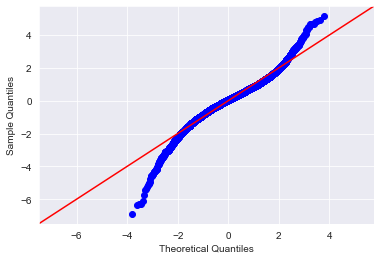

In [91]:
#CHECKING IF RESIDUALS ARE NORMALLY DISTRIBUTED
fig = sm.graphics.qqplot(model_4.resid, dist=stats.norm, line='45', fit=True)

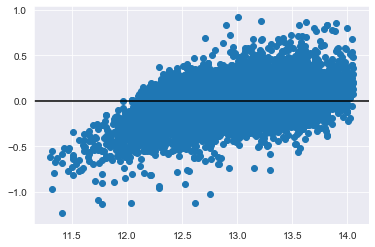

In [92]:
#CHECKING FOR HOMOSCEDACITY
plt.scatter(train_df_4['log_price'],model_4.resid)
plt.axhline(0,color='black')

**ANALYSIS**

By log transforming the target value (Price), the interpretability of the model decreased drastically without adding too much benefit. The R^2 only increased around 1%. The best model is still Model6, which uses the zip codes instead of sub regions. Did not do test model because did not see the benefit of doing so.

# 3 - MOST/LEAST IMPORTANT FEATURES

I'll be running Model 6 (zipcode model) and will be standardizing the data to determine the most important features.
On previous models, we saw how each feature affected price, meaning by increasing 1 unit of that feature, it would impact the price by x number of dollars, which was determined by the coefficients. Now by standadizing the data, we will be able to see the 'weight' of each feature.

In [93]:
#DROPPING COLUMNS NOT BEING USED IN MODEL
model6_df = df.drop(['lat','long','Sub_Region','date'],axis = 1)

#DROPPING COLUMNS WITH HIGH CORRELATION
model6_df = model6_df.drop(['sqft_above','yr_renovated','yr_built','sqft_lot15','sqft_living15'],axis = 1)

#STARDADIZING DATA EXCEPT TARGET (PRICE) AND CATEGORICAL COLUMNS
for col in model6_df.drop(['zipcode','waterfront','price'],axis=1).columns:
    model6_df[col] = stats.zscore(model6_df[col])
    
model6_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,zipcode,year_sold,renovated_post_1990,house_age_when_sold,has_basement
0,221900.00000,-0.34165,-1.51074,-1.06468,-0.38152,-0.88386,0,-0.63169,-0.48295,98178,-0.69112,-0.14333,0.50835,-0.03626
1,538000.00000,-0.34165,0.10029,1.11112,-0.20888,0.96254,0,-0.63169,-0.48295,98125,-0.69112,6.97667,0.64417,27.58019
2,180000.00000,-1.64442,-1.51074,-1.70647,0.09022,-0.88386,0,-0.63169,-1.52635,98028,1.44692,-0.14333,1.28935,-0.03626
3,604000.00000,0.96111,1.71133,0.15627,-0.45201,-0.88386,0,2.46451,-0.48295,98136,-0.69112,-0.14333,0.16878,27.58019
4,510000.00000,-0.34165,0.10029,-0.28202,-0.11800,-0.88386,0,-0.63169,0.56046,98074,1.44692,-0.14333,-0.54430,-0.03626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.00000,-0.34165,0.10029,-0.51682,-0.87159,2.80895,0,-0.63169,0.56046,98103,-0.69112,-0.14333,-1.32530,-0.03626
21593,400000.00000,0.96111,0.10029,0.70414,-0.36385,0.96254,0,-0.63169,0.56046,98146,1.44692,-0.14333,-1.46112,-0.03626
21594,402101.00000,-1.64442,-1.51074,-1.31514,-0.84784,0.96254,0,-0.63169,-0.48295,98144,-0.69112,-0.14333,-1.32530,-0.03626
21595,400000.00000,-0.34165,0.10029,-0.40725,-0.73528,0.96254,0,-0.63169,0.56046,98027,1.44692,-0.14333,-1.12156,-0.03626


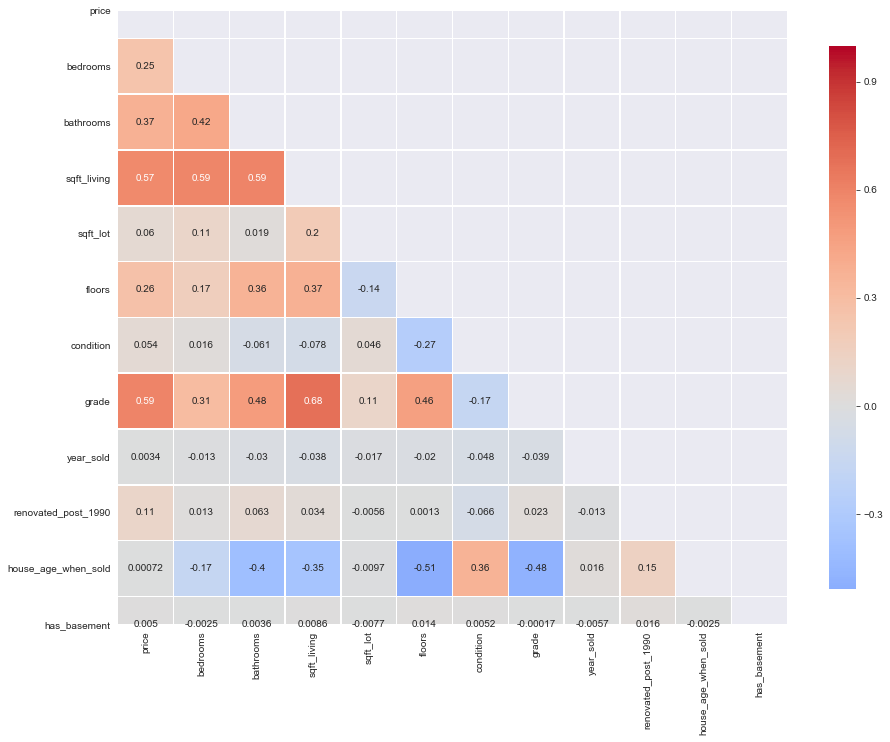

In [94]:
#CORRELATION HEATMAP
corr = model6_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 20))

sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, center=0,
            square=True, linewidths=.5,annot=True, cbar_kws={"shrink": .5});

In [95]:
# #TURNING COLUMNS TO STRING FOR HOT ENCODING
categories_2 = ['zipcode','waterfront']

#HOT ENCODING
dummies = pd.get_dummies(model6_df[categories_2],prefix = categories_2,drop_first = True)
df_preprocessed_6 = model6_df.drop(categories_2,axis = 1)
df_preprocessed_6 = pd.concat([df_preprocessed_6,dummies],axis = 1)
df_preprocessed_6

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,year_sold,renovated_post_1990,house_age_when_sold,has_basement,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,...,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,waterfront_1
0,221900.00000,-0.34165,-1.51074,-1.06468,-0.38152,-0.88386,-0.63169,-0.48295,-0.69112,-0.14333,0.50835,-0.03626,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,538000.00000,-0.34165,0.10029,1.11112,-0.20888,0.96254,-0.63169,-0.48295,-0.69112,6.97667,0.64417,27.58019,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,180000.00000,-1.64442,-1.51074,-1.70647,0.09022,-0.88386,-0.63169,-1.52635,1.44692,-0.14333,1.28935,-0.03626,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,604000.00000,0.96111,1.71133,0.15627,-0.45201,-0.88386,2.46451,-0.48295,-0.69112,-0.14333,0.16878,27.58019,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,510000.00000,-0.34165,0.10029,-0.28202,-0.11800,-0.88386,-0.63169,0.56046,1.44692,-0.14333,-0.54430,-0.03626,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.00000,-0.34165,0.10029,-0.51682,-0.87159,2.80895,-0.63169,0.56046,-0.69112,-0.14333,-1.32530,-0.03626,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21593,400000.00000,0.96111,0.10029,0.70414,-0.36385,0.96254,-0.63169,0.56046,1.44692,-0.14333,-1.46112,-0.03626,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
21594,402101.00000,-1.64442,-1.51074,-1.31514,-0.84784,0.96254,-0.63169,-0.48295,-0.69112,-0.14333,-1.32530,-0.03626,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
21595,400000.00000,-0.34165,0.10029,-0.40725,-0.73528,0.96254,-0.63169,0.56046,1.44692,-0.14333,-1.12156,-0.03626,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [96]:
#DEFINING TARGET AND PREDICTORS
y = 'price'
df_predictors_6 = df_preprocessed_6.drop('price',axis = 1)
X_6 = list(df_predictors_6.columns)

In [97]:
#TRAIN-TEST SPLIT
X_train_6, X_test_6, y_train_6, y_test_6 = train_test_split(df_preprocessed_6[X_6], df_preprocessed_6[y], test_size=0.25, random_state=69)
print(len(X_train_6), len(X_test_6), len(y_train_6), len(y_test_6))

13710 4570 13710 4570


In [98]:
#COMBINING XTRAIN YTRAIN AND XTEST YTEST
train_df_6 = pd.concat([y_train_6,X_train_6],axis=1)
test_df_6 = pd.concat([y_test_6,X_test_6],axis=1)

In [99]:
#FITTING MODEL
predictors_6 = '+'.join(X_train_6.columns)
formula = y + '~' + predictors_6
model_6 = ols(formula=formula, data=train_df_6).fit()
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     737.4
Date:                Thu, 06 Aug 2020   Prob (F-statistic):               0.00
Time:                        18:45:17   Log-Likelihood:            -1.7555e+05
No. Observations:               13710   AIC:                         3.513e+05
Df Residuals:                   13628   BIC:                         3.519e+05
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            2.959e+05   5521.358     53.584      0.000    2.85e+05    3.07e+05
bedrooms            -6057.9712    979.648     -6.184      0.000   -7978.217   -4137.726
bathrooms            2580.2791   1021.161      2.527      0.012     578.663    4581.895
sqft_living          8.461e+04   1373.516     61.601      0.000    8.19e+04    8.73e+04
sqft_lot             1.011e+04    908.367     11.131      0.000    8330.388    1.19e+04
floors                389.7866   1035.198      0.377      0.707   -1639.344    2418.918
condition            1.394e+04    859.153     16.230      0.000    1.23e+04    1.56e+04
grade                5.363e+04   1249.925     42.907      0.000    5.12e+04    5.61e+04
year_sold            1.186e+04    759.356     15.615      0.000    1.04e+04    1.33e+04
renovated_post_1990  7219.1593    781.507      9.237      0.000    5687.299    8751.020
house_age_when_sold  2.064e+04   1269.522     16.258      0.000    1.82e+04    2.31e+04
has_basement          985.5837    827.954      1.190      0.234    -637.321    2608.489
zipcode_98002        7992.4665   9171.758      0.871      0.384   -9985.445     2.6e+04
zipcode_98003       -3470.3666   8399.232     -0.413      0.679   -1.99e+04     1.3e+04
zipcode_98004        5.143e+05   9807.153     52.437      0.000    4.95e+05    5.33e+05
zipcode_98005        3.324e+05   1.08e+04     30.833      0.000    3.11e+05    3.54e+05
zipcode_98006         2.66e+05   8058.606     33.008      0.000     2.5e+05    2.82e+05
zipcode_98007         2.52e+05   1.09e+04     23.130      0.000    2.31e+05    2.73e+05
zipcode_98008        2.395e+05   8557.355     27.988      0.000    2.23e+05    2.56e+05
zipcode_98010        8.087e+04   1.35e+04      5.970      0.000    5.43e+04    1.07e+05
zipcode_98011        1.473e+05   9522.825     15.469      0.000    1.29e+05    1.66e+05
zipcode_98014        9.415e+04   1.36e+04      6.944      0.000    6.76e+04    1.21e+05
zipcode_98019        9.313e+04   1.01e+04      9.257      0.000    7.34e+04    1.13e+05
zipcode_98022        1.044e+04   9514.705      1.097      0.273   -8213.907    2.91e+04
zipcode_98023       -2.088e+04   7256.521     -2.877      0.004   -3.51e+04   -6652.096
zipcode_98024        1.234e+05   1.76e+04      7.015      0.000    8.89e+04    1.58e+05
zipcode_98027         2.01e+05   8142.918     24.687      0.000    1.85e+05    2.17e+05
zipcode_98028        1.323e+05   8539.247     15.491      0.000    1.16e+05    1.49e+05
zipcode_98029        2.234e+05   8090.826     27.606      0.000    2.07e+05    2.39e+05
zipcode_98030         676.8115   8684.268      0.078      0.938   -1.63e+04    1.77e+04
zipcode_98031        6867.1186   8483.642      0.809      0.418   -9761.992    2.35e+04
zipcode_98032         771.0134   1.14e+04      0.068      0.946   -2.16e+04    2.32e+04
zip

In [100]:
#REMOVING FEATURES WITH P-VALUE > 0.05
summary_6 = model_6.summary()
p_table_6 = summary_6.tables[1]
p_table_6 = pd.DataFrame(p_table_6.data)
p_table_6.columns = p_table_6.iloc[0]
p_table_6 = p_table_6.drop(0)
p_table_6 = p_table_6.set_index(p_table_6.columns[0])
p_table_6['P>|t|'] = p_table_6['P>|t|'].astype(float)
x_cols_6 = list(p_table_6[p_table_6['P>|t|'] < 0.05].index)
x_cols_6.remove('Intercept')
print(len(p_table_6), len(x_cols_6))

82 72


In [101]:
#FTTING REVISED MODEL
predictors_6 = '+'.join(x_cols_6)
formula = y + '~' + predictors_6
model_6 = ols(formula=formula, data=train_df_6).fit()
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     829.7
Date:                Thu, 06 Aug 2020   Prob (F-statistic):               0.00
Time:                        18:45:17   Log-Likelihood:            -1.7555e+05
No. Observations:               13710   AIC:                         3.512e+05
Df Residuals:                   13637   BIC:                         3.518e+05
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            2.997e+05   2328.028    128.745      0.000    2.95e+05    3.04e+05
bedrooms            -6054.3194    978.967     -6.184      0.000   -7973.230   -4135.409
bathrooms            2563.4715   1020.504      2.512      0.012     563.143    4563.800
sqft_living          8.472e+04   1360.140     62.291      0.000    8.21e+04    8.74e+04
sqft_lot             1.008e+04    901.481     11.178      0.000    8309.968    1.18e+04
condition            1.404e+04    854.636     16.430      0.000    1.24e+04    1.57e+04
grade                5.356e+04   1239.778     43.203      0.000    5.11e+04     5.6e+04
year_sold            1.187e+04    759.094     15.634      0.000    1.04e+04    1.34e+04
renovated_post_1990  7286.8319    780.267      9.339      0.000    5757.401    8816.263
house_age_when_sold  2.031e+04   1166.122     17.419      0.000     1.8e+04    2.26e+04
zipcode_98004        5.105e+05   8428.953     60.566      0.000    4.94e+05    5.27e+05
zipcode_98005        3.283e+05   9548.381     34.384      0.000     3.1e+05    3.47e+05
zipcode_98006        2.619e+05   6306.389     41.536      0.000     2.5e+05    2.74e+05
zipcode_98007        2.483e+05   9666.060     25.683      0.000    2.29e+05    2.67e+05
zipcode_98008        2.354e+05   6928.939     33.972      0.000    2.22e+05    2.49e+05
zipcode_98010        7.688e+04   1.26e+04      6.097      0.000    5.22e+04    1.02e+05
zipcode_98011        1.433e+05   8112.145     17.667      0.000    1.27e+05    1.59e+05
zipcode_98014        9.016e+04   1.26e+04      7.135      0.000    6.54e+04    1.15e+05
zipcode_98019        8.921e+04   8742.132     10.204      0.000    7.21e+04    1.06e+05
zipcode_98023       -2.491e+04   5253.631     -4.742      0.000   -3.52e+04   -1.46e+04
zipcode_98024        1.196e+05   1.69e+04      7.086      0.000    8.65e+04    1.53e+05
zipcode_98027        1.971e+05   6433.034     30.642      0.000    1.85e+05     2.1e+05
zipcode_98028        1.283e+05   6934.200     18.499      0.000    1.15e+05    1.42e+05
zipcode_98029        2.195e+05   6337.976     34.639      0.000    2.07e+05    2.32e+05
zipcode_98033        3.242e+05   6016.761     53.885      0.000    3.12e+05    3.36e+05
zipcode_98034        1.839e+05   5122.360     35.903      0.000    1.74e+05    1.94e+05
zipcode_98038        3.832e+04   5134.711      7.464      0.000    2.83e+04    4.84e+04
zipcode_98039        6.504e+05   3.61e+04     17.998      0.000     5.8e+05    7.21e+05
zipcode_98040         4.35e+05   9228.233     47.140      0.000    4.17e+05    4.53e+05
zipcode_98045        9.972e+04   7574.652     13.165      0.000    8.49e+04    1.15e+05
zipcode_98052        2.439e+05   5053.499     48.268      0.000    2.34e+05    2.54e+05
zipcode_98053        2.406e+05   6370.692     37.771      0.000    2.28e+05    2.53e+05
zip

In [102]:
#GETTING MODEL COEF
model_6.params.sort_values()

zipcode_98092         -26067.61965
zipcode_98023         -24911.54523
bedrooms               -6054.31942
bathrooms               2563.47148
renovated_post_1990     7286.83194
                          ...     
zipcode_98109         414497.25495
zipcode_98040         435015.06940
zipcode_98112         435643.07601
zipcode_98004         510508.32469
zipcode_98039         650359.50565
Length: 73, dtype: float64

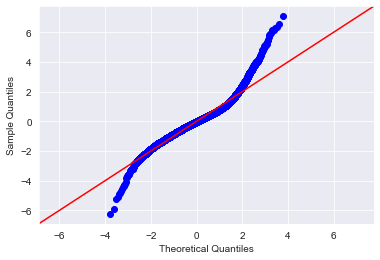

In [103]:
#CHECKING IF RESIDUALS ARE NORMALLY DISTRIBUTED
fig = sm.graphics.qqplot(model_6.resid, dist=stats.norm, line='45', fit=True)

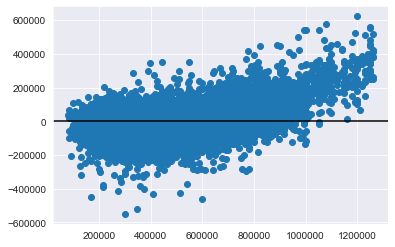

In [104]:
#CHECKING FOR HOMOSCEDACITY
plt.scatter(train_df_6['price'],model_6.resid)
plt.axhline(0,color='black')

In [105]:
#FITTING MODEL WITH TEST DATA
predictors_6 = '+'.join(X_train_6.columns)
formula = y + '~' + predictors_6
model_6_test = ols(formula=formula, data=test_df_6).fit()
model_6_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     258.4
Date:                Thu, 06 Aug 2020   Prob (F-statistic):               0.00
Time:                        18:45:18   Log-Likelihood:                -58518.
No. Observations:                4570   AIC:                         1.172e+05
Df Residuals:                    4488   BIC:                         1.177e+05
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            2.898e+05   9977.744     29.041      0.000     2.7e+05    3.09e+05
bedrooms            -3782.3984   1710.050     -2.212      0.027   -7134.938    -429.859
bathrooms            4890.4615   1778.902      2.749      0.006    1402.937    8377.986
sqft_living          8.571e+04   2378.069     36.041      0.000     8.1e+04    9.04e+04
sqft_lot             8092.8971   1521.253      5.320      0.000    5110.491    1.11e+04
floors              -1318.4471   1855.659     -0.711      0.477   -4956.454    2319.560
condition            1.473e+04   1513.347      9.736      0.000    1.18e+04    1.77e+04
grade                5.014e+04   2116.533     23.689      0.000     4.6e+04    5.43e+04
year_sold            1.039e+04   1332.758      7.797      0.000    7779.079     1.3e+04
renovated_post_1990  7767.7704   1392.230      5.579      0.000    5038.314    1.05e+04
house_age_when_sold  1.558e+04   2248.472      6.930      0.000    1.12e+04       2e+04
has_basement         -866.3174   1088.091     -0.796      0.426   -2999.512    1266.877
zipcode_98002        1.503e+04   1.73e+04      0.870      0.384   -1.88e+04    4.89e+04
zipcode_98003       -3042.5866   1.46e+04     -0.208      0.835   -3.17e+04    2.56e+04
zipcode_98004         6.13e+05   1.79e+04     34.216      0.000    5.78e+05    6.48e+05
zipcode_98005        3.207e+05   1.85e+04     17.335      0.000    2.84e+05    3.57e+05
zipcode_98006        2.761e+05   1.38e+04     19.974      0.000    2.49e+05    3.03e+05
zipcode_98007        2.541e+05   1.91e+04     13.300      0.000    2.17e+05    2.92e+05
zipcode_98008        2.333e+05   1.59e+04     14.683      0.000    2.02e+05    2.65e+05
zipcode_98010        7.516e+04   2.32e+04      3.233      0.001    2.96e+04    1.21e+05
zipcode_98011         1.43e+05    1.7e+04      8.424      0.000     1.1e+05    1.76e+05
zipcode_98014        1.115e+05   2.18e+04      5.109      0.000    6.87e+04    1.54e+05
zipcode_98019         1.11e+05   1.71e+04      6.498      0.000    7.75e+04    1.44e+05
zipcode_98022        6491.4535   1.77e+04      0.366      0.714   -2.83e+04    4.12e+04
zipcode_98023           -2e+04   1.29e+04     -1.551      0.121   -4.53e+04    5279.789
zipcode_98024        1.647e+05   3.13e+04      5.260      0.000    1.03e+05    2.26e+05
zipcode_98027        1.995e+05   1.48e+04     13.518      0.000    1.71e+05    2.28e+05
zipcode_98028        1.341e+05   1.44e+04      9.323      0.000    1.06e+05    1.62e+05
zipcode_98029        2.317e+05    1.5e+04     15.433      0.000    2.02e+05    2.61e+05
zipcode_98030        1.916e+04   1.45e+04      1.319      0.187   -9313.745    4.76e+04
zipcode_98031        2.116e+04   1.44e+04      1.473      0.141   -6999.772    4.93e+04
zipcode_98032         -1.1e+04    1.8e+04     -0.610      0.542   -4.63e+04    2.43e+04
zip

In [106]:
#REMOVING FEATURES WITH P-VALUE > 0.05
summary_6_test = model_6_test.summary()
p_table_6_test = summary_6_test.tables[1]
p_table_6_test = pd.DataFrame(p_table_6_test.data)
p_table_6_test.columns = p_table_6_test.iloc[0]
p_table_6_test = p_table_6_test.drop(0)
p_table_6_test = p_table_6_test.set_index(p_table_6_test.columns[0])
p_table_6_test['P>|t|'] = p_table_6_test['P>|t|'].astype(float)
x_cols_6_test = list(p_table_6_test[p_table_6_test['P>|t|'] < 0.05].index)
x_cols_6_test.remove('Intercept')
print(len(p_table_6_test), len(x_cols_6_test))

82 69


In [107]:
#FITTING REVISED TEST MODEL
predictors_6_test = '+'.join(x_cols_6_test)
formula = y + '~' + predictors_6_test
model_6_test = ols(formula=formula, data=test_df_6).fit()
model_6_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     301.8
Date:                Thu, 06 Aug 2020   Prob (F-statistic):               0.00
Time:                        18:45:18   Log-Likelihood:                -58533.
No. Observations:                4570   AIC:                         1.172e+05
Df Residuals:                    4500   BIC:                         1.177e+05
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            2.919e+05   3389.486     86.129      0.000    2.85e+05    2.99e+05
bedrooms            -3724.1320   1710.385     -2.177      0.030   -7077.326    -370.938
bathrooms            5048.3013   1776.702      2.841      0.005    1565.092    8531.511
sqft_living          8.522e+04   2350.717     36.251      0.000    8.06e+04    8.98e+04
sqft_lot             8387.1331   1503.609      5.578      0.000    5439.321    1.13e+04
condition            1.503e+04   1502.030     10.006      0.000    1.21e+04     1.8e+04
grade                4.941e+04   2102.198     23.502      0.000    4.53e+04    5.35e+04
year_sold            1.042e+04   1332.581      7.821      0.000    7810.175     1.3e+04
renovated_post_1990  7641.3278   1390.879      5.494      0.000    4914.521    1.04e+04
house_age_when_sold  1.598e+04   2075.024      7.703      0.000    1.19e+04    2.01e+04
zipcode_98004        6.114e+05   1.53e+04     40.025      0.000    5.81e+05    6.41e+05
zipcode_98005        3.192e+05    1.6e+04     19.993      0.000    2.88e+05    3.51e+05
zipcode_98006        2.748e+05   1.01e+04     27.116      0.000    2.55e+05    2.95e+05
zipcode_98007        2.525e+05   1.67e+04     15.152      0.000     2.2e+05    2.85e+05
zipcode_98008        2.313e+05   1.28e+04     18.038      0.000    2.06e+05    2.56e+05
zipcode_98010        7.218e+04   2.13e+04      3.384      0.001    3.04e+04    1.14e+05
zipcode_98011        1.414e+05   1.42e+04      9.977      0.000    1.14e+05    1.69e+05
zipcode_98014        1.089e+05   1.98e+04      5.509      0.000    7.01e+04    1.48e+05
zipcode_98019        1.079e+05   1.43e+04      7.531      0.000    7.98e+04    1.36e+05
zipcode_98024        1.623e+05      3e+04      5.413      0.000    1.04e+05    2.21e+05
zipcode_98027        1.974e+05   1.14e+04     17.275      0.000    1.75e+05     2.2e+05
zipcode_98028        1.324e+05   1.09e+04     12.095      0.000    1.11e+05    1.54e+05
zipcode_98029        2.297e+05   1.17e+04     19.596      0.000    2.07e+05    2.53e+05
zipcode_98033        3.211e+05   1.03e+04     31.212      0.000    3.01e+05    3.41e+05
zipcode_98034        1.951e+05   8759.265     22.273      0.000    1.78e+05    2.12e+05
zipcode_98038        3.754e+04   8291.613      4.527      0.000    2.13e+04    5.38e+04
zipcode_98039        7.021e+05   5.16e+04     13.595      0.000    6.01e+05    8.03e+05
zipcode_98040        4.453e+05    1.3e+04     34.310      0.000     4.2e+05    4.71e+05
zipcode_98045        1.125e+05   1.57e+04      7.174      0.000    8.17e+04    1.43e+05
zipcode_98052        2.538e+05   9122.517     27.825      0.000    2.36e+05    2.72e+05
zipcode_98053        2.334e+05   1.25e+04     18.661      0.000    2.09e+05    2.58e+05
zipcode_98055        4.533e+04   1.15e+04      3.952      0.000    2.28e+04    6.78e+04
zip

In [108]:
#GETTING REVISED MODEL COEF
model_6_test.params.sort_values()

bedrooms               -3724.13199
bathrooms               5048.30125
renovated_post_1990     7641.32778
sqft_lot                8387.13305
year_sold              10422.68833
                          ...     
zipcode_98119         428155.40900
zipcode_98112         434734.28190
zipcode_98040         445265.14387
zipcode_98004         611447.06580
zipcode_98039         702122.91294
Length: 70, dtype: float64

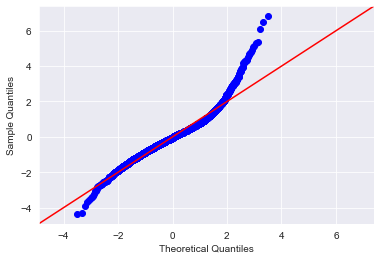

In [109]:
#CHECKING IF RESIDUALS ARE NORMALLY DISTRIBUTED
fig = sm.graphics.qqplot(model_6_test.resid, dist=stats.norm, line='45', fit=True)

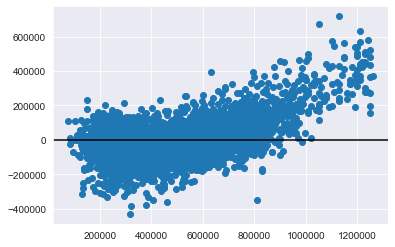

In [110]:
#CHECKING FOR HOMOSCEDACITY
plt.scatter(test_df_6['price'],model_3_test.resid)
plt.axhline(0,color='black')

In [111]:
#CREATING DF FOR MODEL 6 (ZIPCODE MODEL) COEFS
param_df = pd.DataFrame(model_6_test.params)
param_df.reset_index(inplace=True)
param_df.rename(columns={'index':'features',0:'coef'},inplace=True)

#DROPPING COLUMNS THAT CONTAIN ZIPCODES BECAUSE THEY ARE SO MANY AND THEY AREN'T TOO RELEVANT
#TO SUGGEST CHANGES TO A HOUSE
param_df[~param_df['features'].str.contains('zipcode')].sort_values(by='coef')

,features,coef
1,bedrooms,-3724.13199
2,bathrooms,5048.30125
8,renovated_post_1990,7641.32778
4,sqft_lot,8387.13305
7,year_sold,10422.68833
5,condition,15029.02259
9,house_age_when_sold,15983.95740
6,grade,49406.18137
3,sqft_living,85215.79138
69,waterfront_1,168822.88537


**ANALYSIS**

Some of the most important features in a house are being located near the waterfront, sqft living, grade, and age of the house when sold.

Some of the least important features are number of bedrooms and bathrooms, lot size, and if the house was renovated or not.

# CONCLUSIONS & RECOMMENDATIONS

**Question 1**

    By using zip codes instead of sub_regions, model performance increased drastically. That may be due to the sub region category being too broad; there may be a big price variation between zip codes within a region. Next step would be to plot house prices on a map to see how location affects the market.
    
**Question 2**

    Log transforming did improve the model by 1%, but the extra complexity does not justify the increase. Log transformation adds some complexity to the regression model when it comes to interpreting the model's coefficients. With the target variable being log transformed, when the features change by a fixed percentage, the target will also change by a fixed percentage. A change in the features will not be equal to a fixed dollar amount.
    Due to this increased complexity, the regular model was chosen.
    
 **Question 3 and Recommendations**
 
     There are certain things that can be done and certain things that should be avoided when investing into a house. 
     
     These are some recommendations if a home owner wants to increase the value of his house:
         1- Increase the living square footage of the house. Living square footage is worth more than lot square footage.
         2 - Improve the overall grade of the house. If the house is being renovated, invest in high quality materials and luxurious items. Hire an archtect to create a custom design.
         
      Based on the regression model's output, the following things are not recommended when the goal is to increase a house's value:
         1- Adding a new bedroom or bathroom to a house does not guarantee that the house's value will increase. Does not take space from the kitchen or living room in order to make a new bedroom/bathroom. Only add them if the house is being expanded.
         2- Renovating a house might not increase it's value. If you plan to renovate, increase the total living square footage and investing in high quality materials.
         3- Don't go crazy and buy a portion of your neighboor's backyard to increase your lot size. The only way that it will help you is if the lot you buy has a waterfront view.
        
         
